In [205]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


In [206]:
data = pd.read_csv(r"C:\Users\Lily Sun\Desktop\DAT 121\LifeExpectancyData-Python.csv")

# 1. Identify the dependent and independent variables 

# 2. Collect your data 

In [207]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [209]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# 3. Using descriptive methods validate the integrity of the data. 
### Identify missing values, inconsistent measurement, or other possible issues with the data. Scatter plots are helpful for identifying problems. 

In [210]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [211]:
data.duplicated().sum()

0

In [212]:
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [213]:
data_latest_year = data[data['Year'] == 2014]
data_latest_year.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
33,Algeria,2014,Developing,75.4,11.0,21,0.01,54.237318,95.0,0,...,95.0,7.21,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
49,Angola,2014,Developing,51.7,348.0,67,8.33,23.965612,64.0,11699,...,68.0,3.31,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4
65,Antigua and Barbuda,2014,Developing,76.2,131.0,0,8.56,2422.999774,99.0,0,...,96.0,5.54,99.0,0.2,12888.296670,NaN,3.3,3.3,0.782,13.9


In [214]:
data_latest_year.shape

(183, 22)

In [215]:
data_latest_year.isnull().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
Alcohol                             1
percentage expenditure              0
Hepatitis B                        10
Measles                             0
 BMI                                2
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                28
Population                         41
 thinness  1-19 years               2
 thinness 5-9 years                 2
Income composition of resources    10
Schooling                          10
dtype: int64

In [216]:
data_latest_year = data_latest_year.dropna()

In [217]:
print(data_latest_year.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [218]:
print(data_latest_year.shape)

(131, 22)


# 4. Consider various functional forms. 
### There are a number of factors to consider here

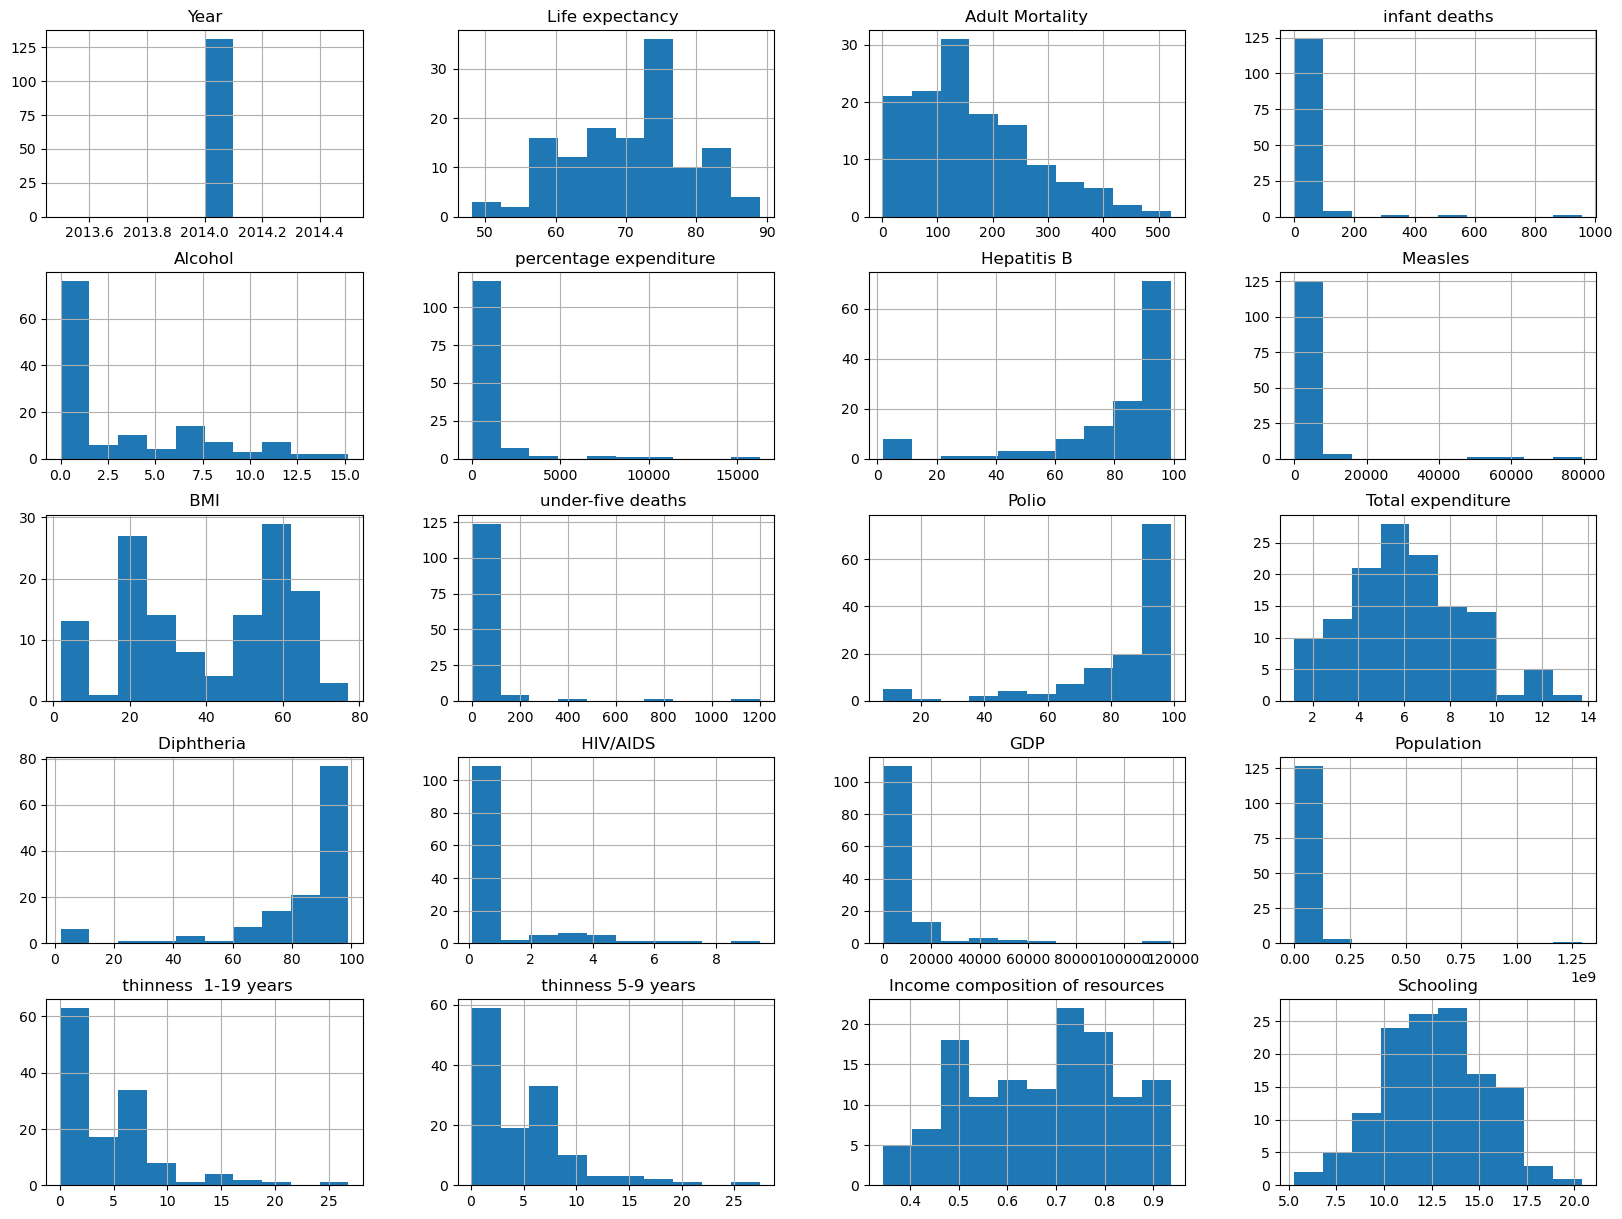

In [219]:
data_latest_year.hist(figsize=(20, 15))
plt.show()

In [220]:
data_latest_year.columns = data_latest_year.columns.str.strip()  # Remove leading/trailing spaces
data_latest_year.columns = data_latest_year.columns.str.replace(" ", "_").str.lower()  # Replace spaces with underscores and lowercase
print(data_latest_year.columns)

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


### Using scatter plots and simple linear regression models look for patterns in the data.  

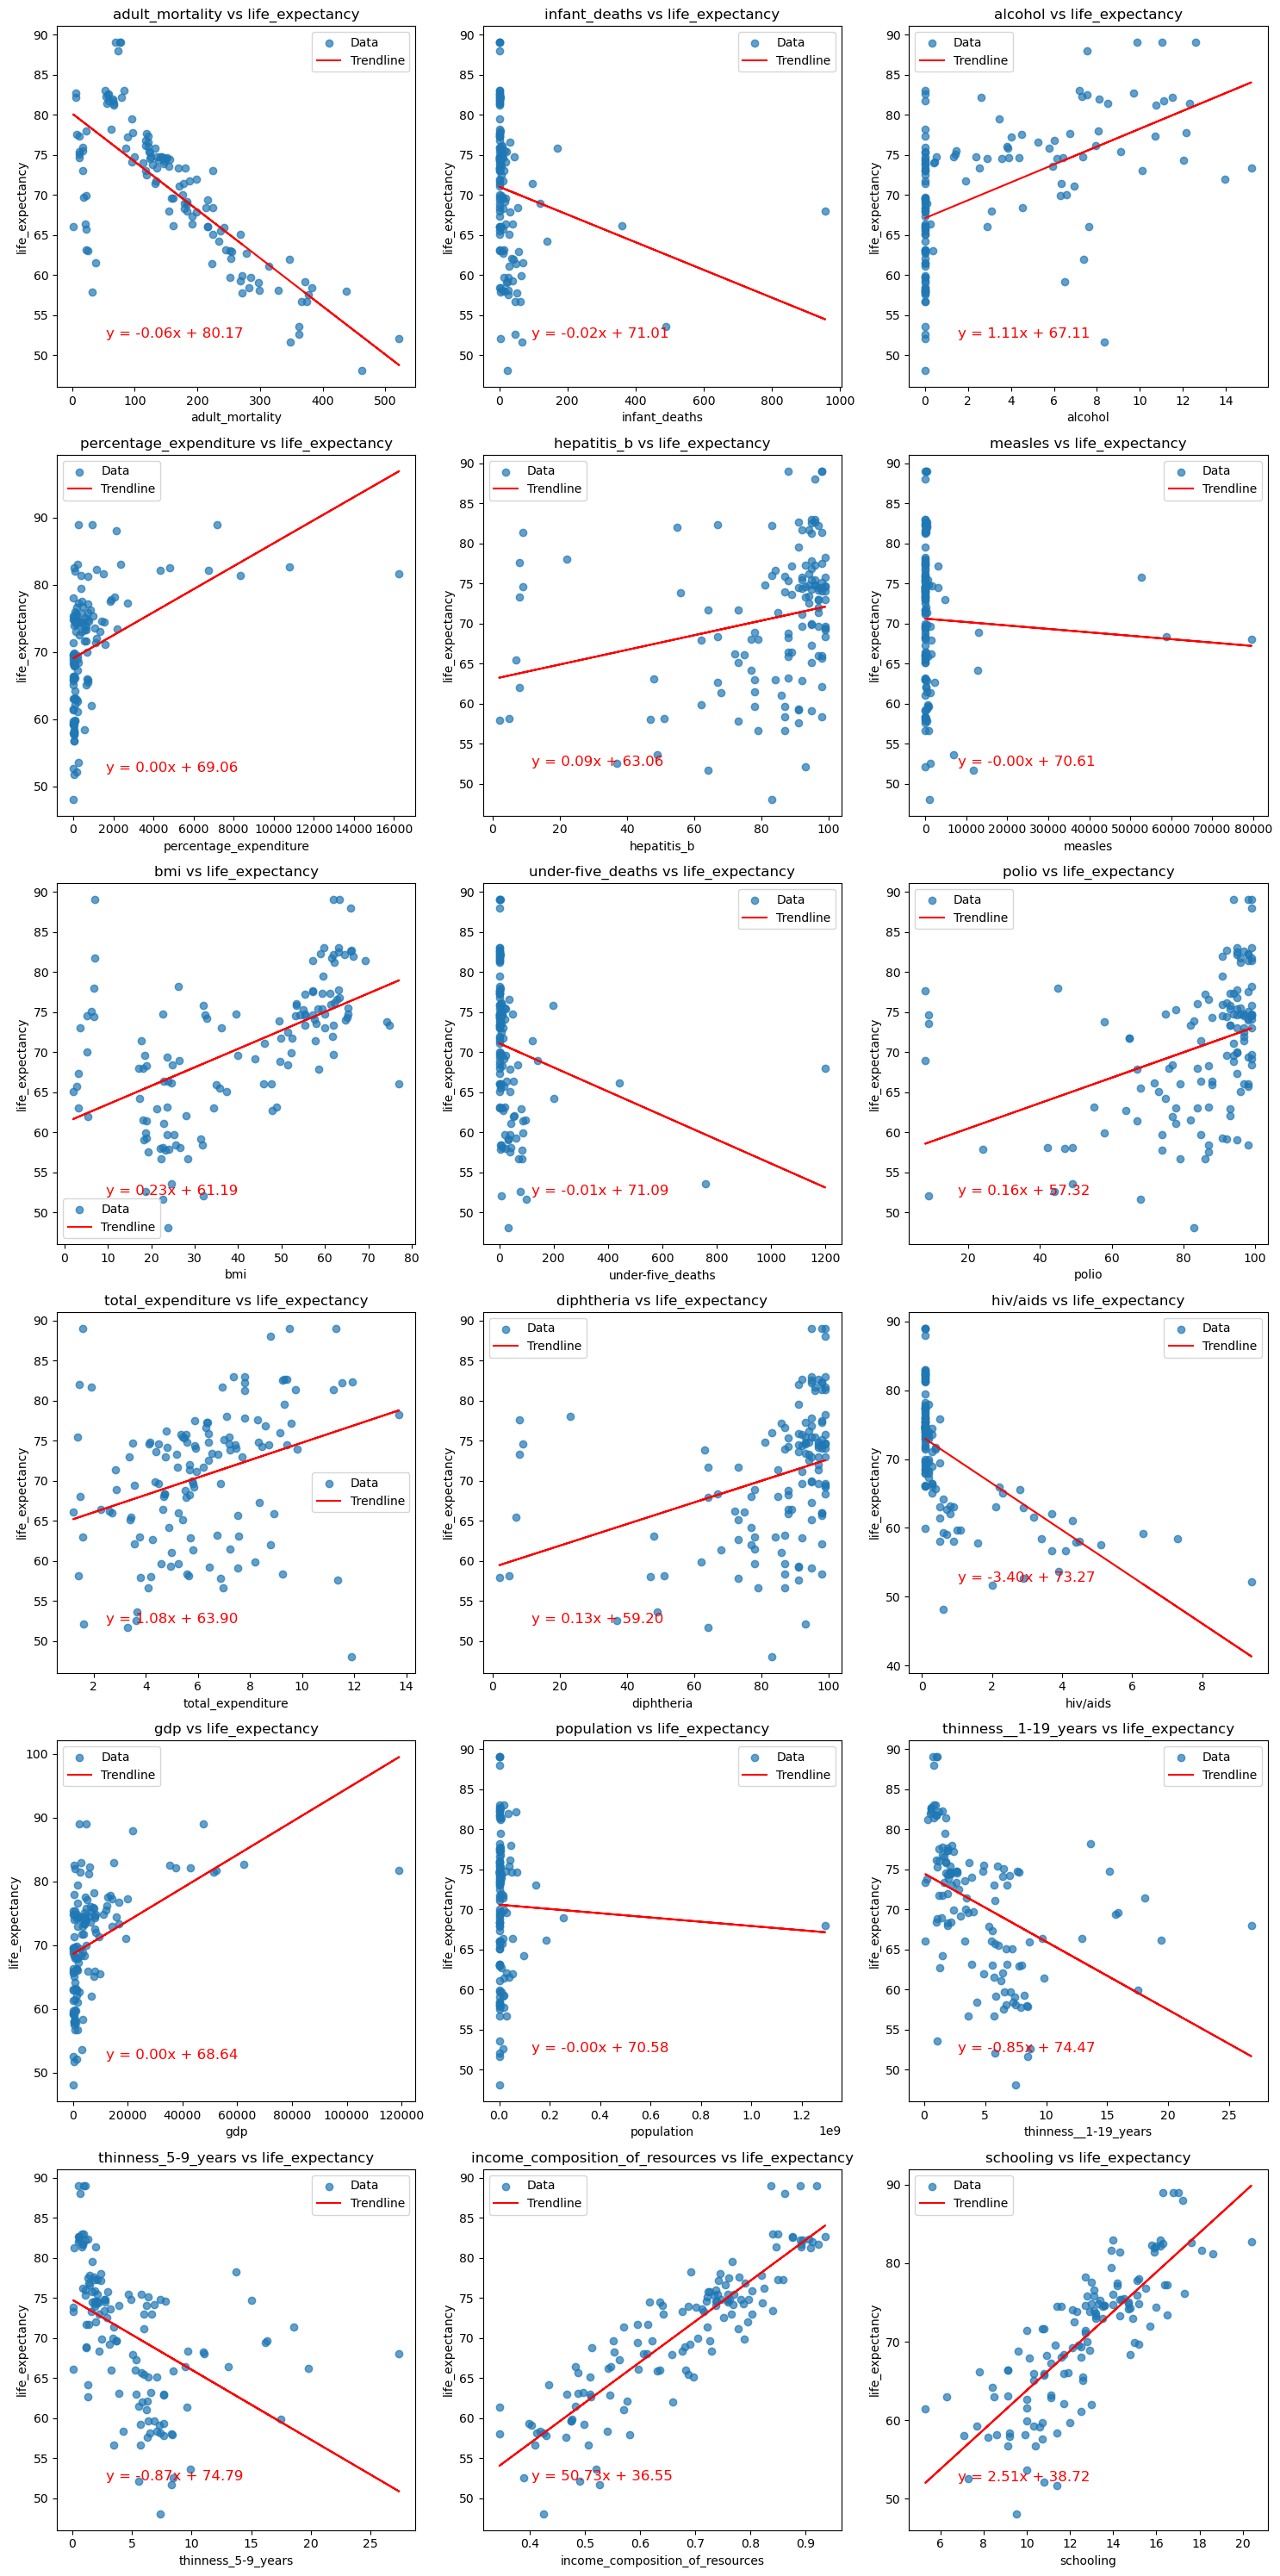

In [221]:
dependent_var = 'life_expectancy'
independent_vars = [col for col in data_latest_year.columns if col != dependent_var and col != 'country' and col != 'status' and col != 'year']

# Determine number of subplots (rows and columns)
n_vars = len(independent_vars)
n_cols = 3  # Choose the number of columns
n_rows = -(-n_vars // n_cols)  # Ceiling division to determine rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot scatterplots with trendlines
for i, var in enumerate(independent_vars):
    # Scatter plot
    axes[i].scatter(data_latest_year[var], data_latest_year[dependent_var], alpha=0.7, label='Data')
    
    # Compute the trendline
    x = data_latest_year[var]
    y = data_latest_year[dependent_var]
    coefficients = np.polyfit(x, y, 1)  # Linear fit (degree=1)
    trendline = np.poly1d(coefficients)

    # Extract slope and intercept
    slope, intercept = coefficients
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Plot the trendline
    axes[i].plot(x, trendline(x), color='red', label='Trendline')

    # Add equation of the trendline to the plot
    # Position the equation based on the data range
    x_pos = x.min() + (x.max() - x.min()) * 0.1
    y_pos = y.min() + (y.max() - y.min()) * 0.1
    axes[i].text(x_pos, y_pos, equation, color='red', fontsize=12)
    
    # Add labels and title
    axes[i].set_title(f"{var} vs {dependent_var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(dependent_var)
    axes[i].legend()

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\Lily Sun\AppData\Local\Temp\ipykernel_48500\2620459381.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_latest_year.drop(columns=['year']).corr()


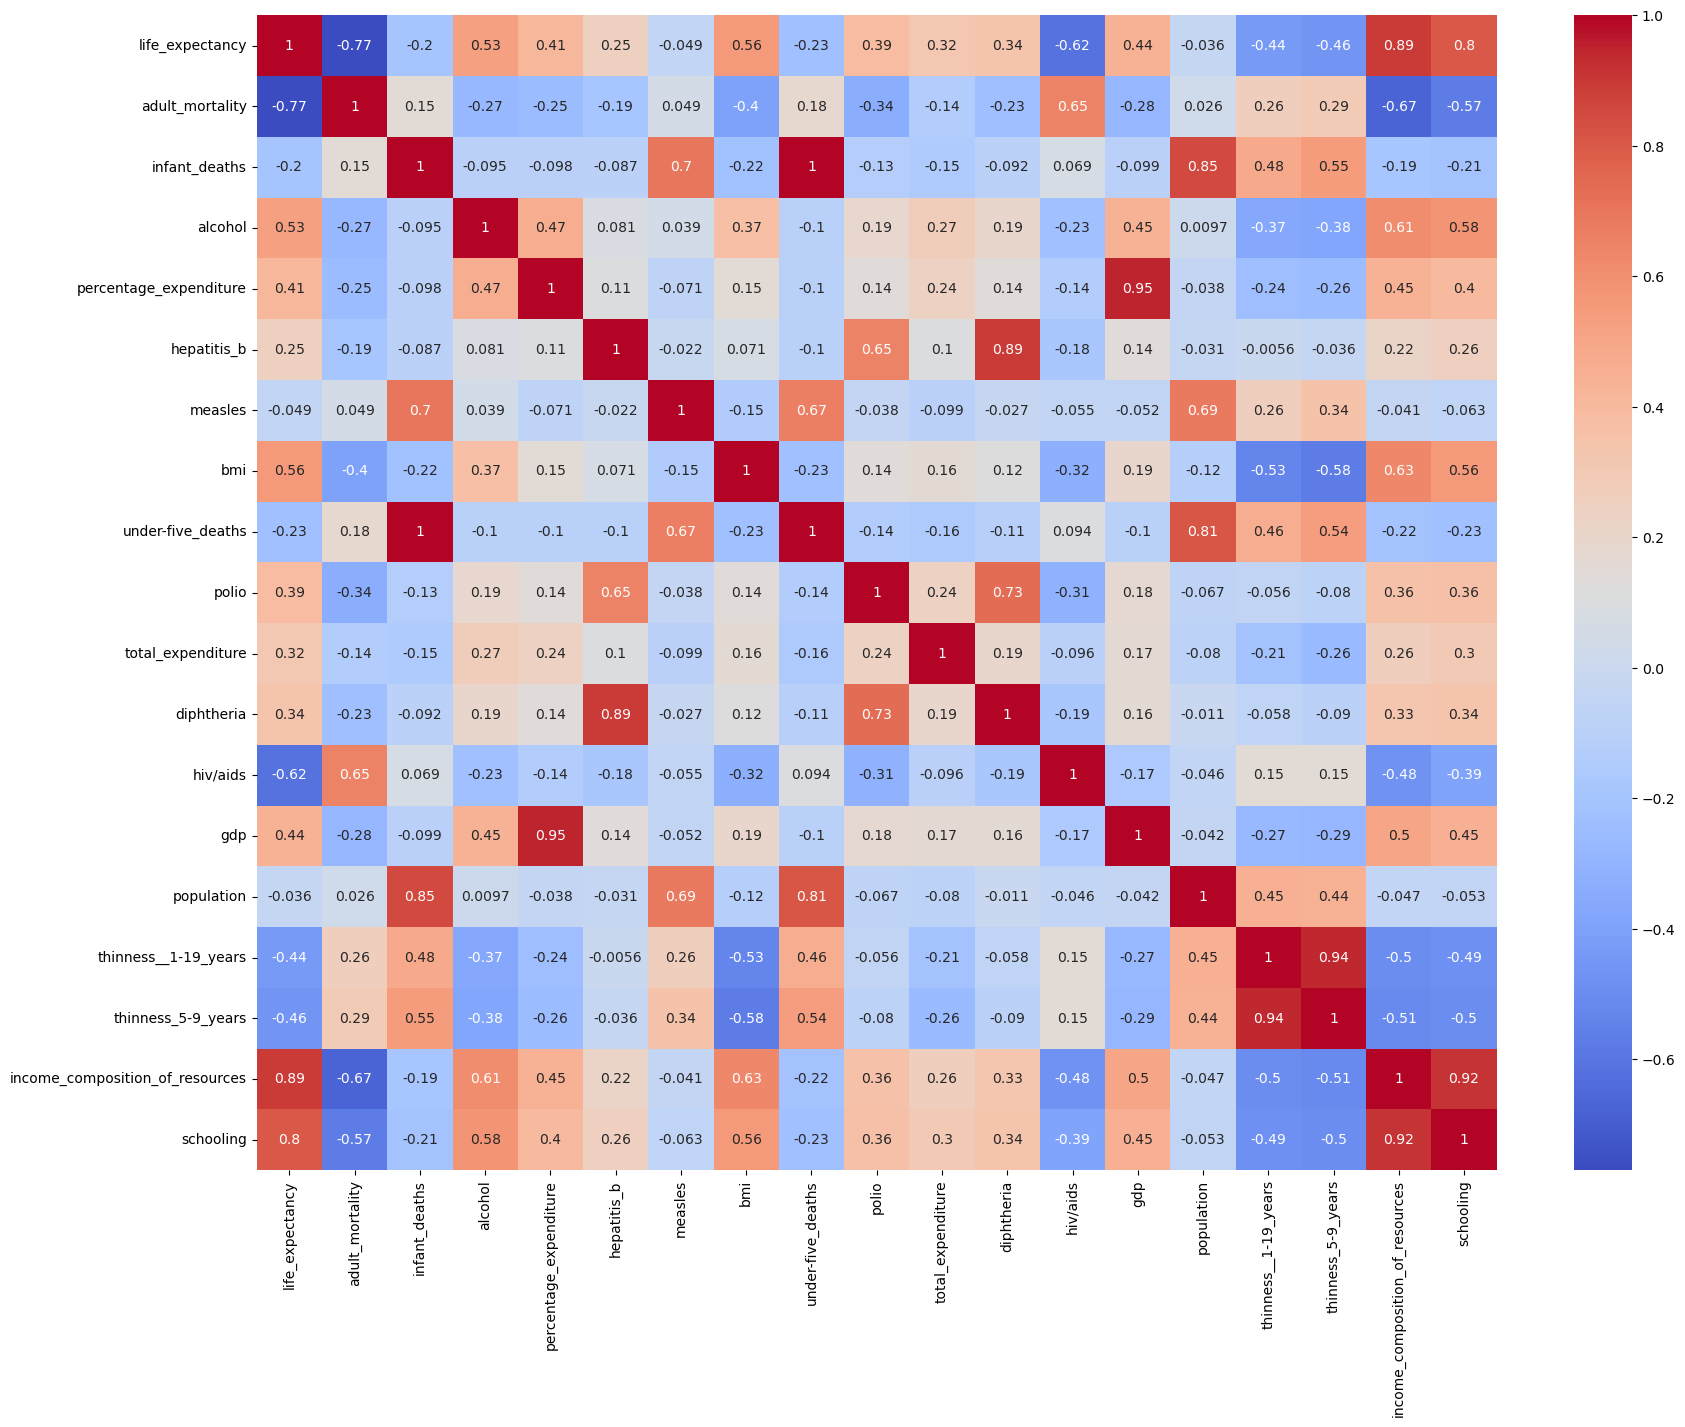

In [222]:
plt.figure(figsize=(20, 15))
corr = data_latest_year.drop(columns=['year']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [223]:
data_latest_year.skew()

C:\Users\Lily Sun\AppData\Local\Temp\ipykernel_48500\178102410.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_latest_year.skew()


year                                0.000000
life_expectancy                    -0.224346
adult_mortality                     0.755771
infant_deaths                       7.310781
alcohol                             1.090225
percentage_expenditure              4.919264
hepatitis_b                        -2.129445
measles                             6.400972
bmi                                -0.225871
under-five_deaths                   6.956292
polio                              -2.181121
total_expenditure                   0.317158
diphtheria                         -2.403467
hiv/aids                            2.954731
gdp                                 4.622799
population                         10.197060
thinness__1-19_years                2.036581
thinness_5-9_years                  1.927627
income_composition_of_resources    -0.241757
schooling                          -0.035990
dtype: float64

A value > 0.5 (positively skewed) or < -0.5 (negatively skewed) may indicate significant skewness.

Highly skewed variables (positive skew):
positively_skewed_vars = [
    'infant_deaths', 'percentage_expenditure', 'measles', 
    'under-five_deaths', 'hiv/aids', 'gdp', 'population',
]

negatively_skewed_vars = ['Hepatitis B', 'Polio', 'Diphtheria']

In [224]:
data_latest_year.columns = data_latest_year.columns.str.strip()  # Remove leading/trailing spaces
data_latest_year.columns = data_latest_year.columns.str.replace(" ", "_").str.lower()  # Replace spaces with underscores and lowercase
print(data_latest_year.columns)

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


In [225]:
positively_skewed_vars = [
    'infant_deaths', 'percentage_expenditure', 'measles', 
    'under-five_deaths', 'hiv/aids', 'gdp', 'population'
]

for var in positively_skewed_vars:
    data_latest_year[var] = np.log1p(data_latest_year[var])

In [226]:
# Apply reverse-log transformation to negatively skewed variables
negatively_skewed_vars = ['hepatitis_b', 'polio', 'diphtheria']

for var in negatively_skewed_vars:
    data_latest_year[var] = np.log1p(data_latest_year[var].max() - data_latest_year[var])

In [227]:
data_latest_year.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,131.0,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,2014.0,70.519847,160.374046,1.796202,3.060916,5.124371,2.201642,2.966208,40.475573,1.958359,2.089169,6.106718,2.047443,0.399527,7.553216,14.107434,4.648092,4.886260,0.669687,12.676336
std,0.0,8.605226,110.142379,1.622355,4.090299,1.989415,1.223194,3.163990,20.733667,1.723045,1.256008,2.533227,1.248268,0.534575,1.865930,2.655054,4.420587,4.543478,0.151314,2.750380
min,2014.0,48.100000,2.000000,0.000000,0.010000,0.366587,0.000000,0.000000,2.000000,0.000000,0.000000,1.210000,0.000000,0.095310,2.586058,3.737670,0.100000,0.100000,0.345000,5.300000
25%,2014.0,64.650000,74.500000,0.000000,0.010000,3.897526,1.386294,0.000000,22.850000,0.693147,1.098612,4.485000,1.098612,0.095310,6.320552,12.569321,1.500000,1.550000,0.544000,10.750000
50%,2014.0,72.000000,144.000000,1.386294,0.010000,5.296988,2.197225,2.397895,45.900000,1.386294,2.079442,5.820000,2.079442,0.095310,7.833520,14.262102,3.300000,3.500000,0.697000,12.700000
75%,2014.0,75.800000,225.000000,3.043387,6.305000,6.578302,3.091042,5.671602,59.450000,3.275540,3.091042,7.630000,2.994481,0.405465,8.914467,15.901624,6.650000,6.800000,0.779000,14.700000
max,2014.0,89.000000,522.000000,6.864848,15.190000,9.696227,4.584967,11.284317,77.100000,7.090910,4.521789,13.730000,4.584967,2.341806,11.688338,20.980895,26.800000,27.400000,0.936000,20.400000


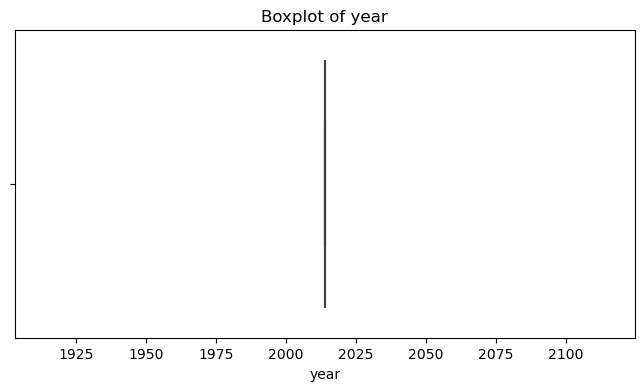

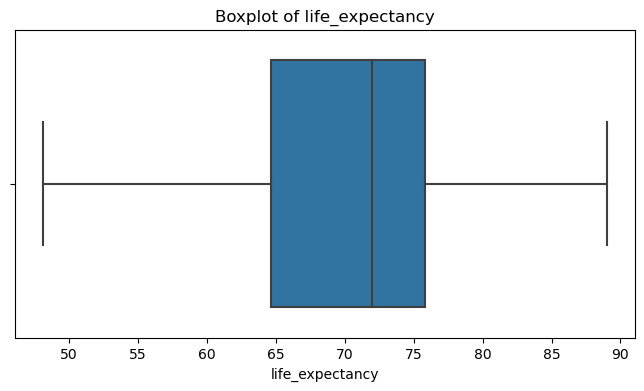

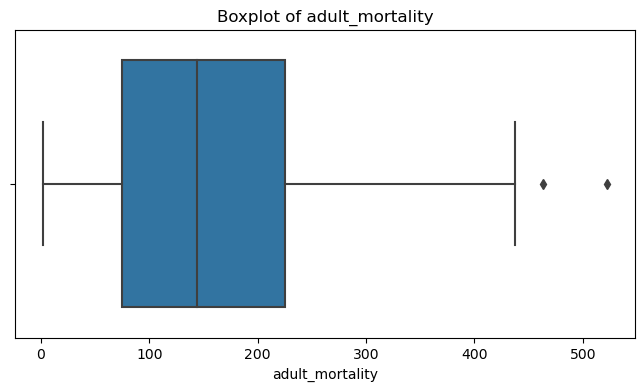

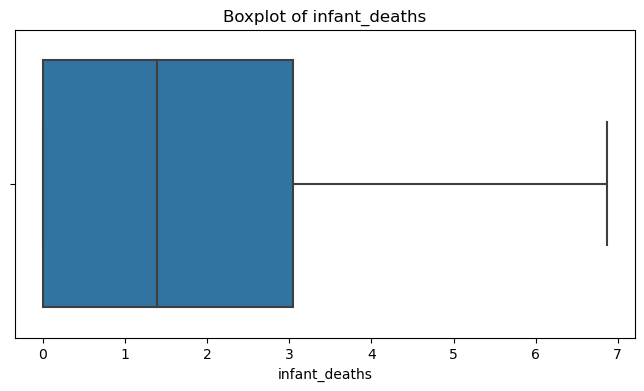

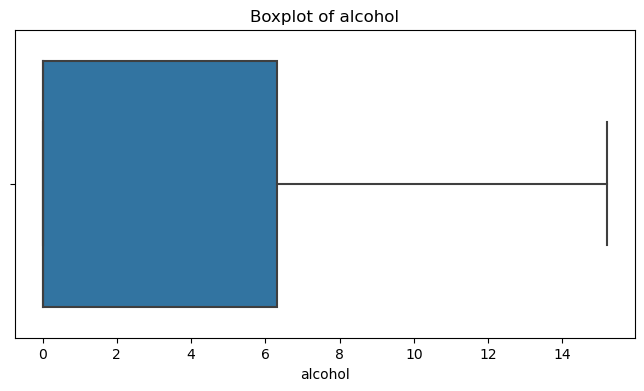

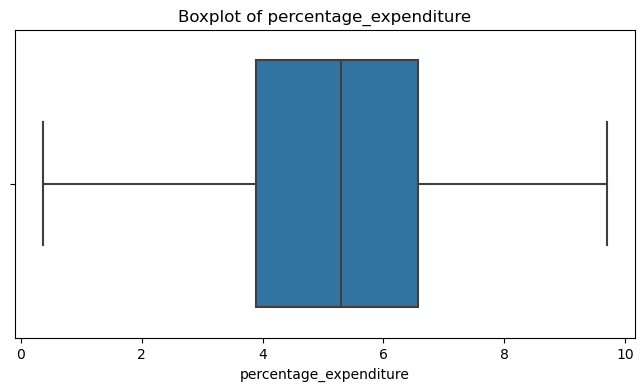

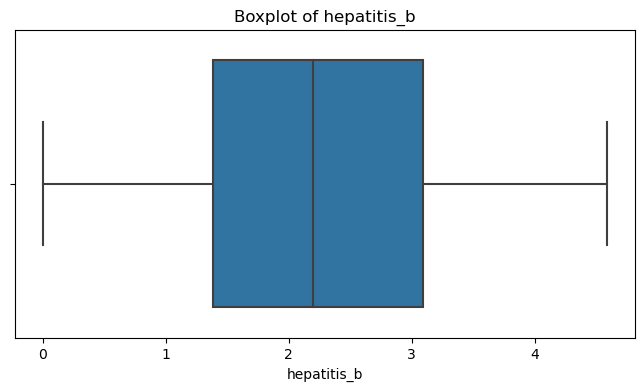

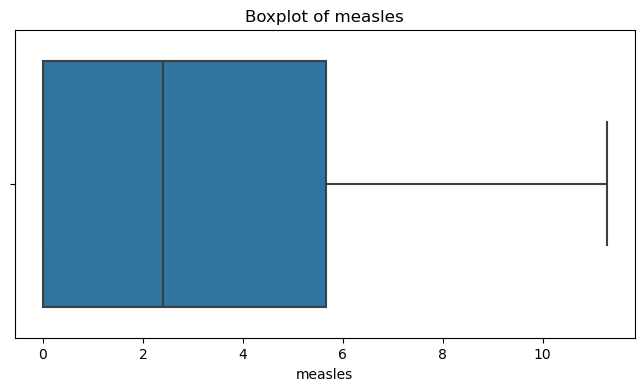

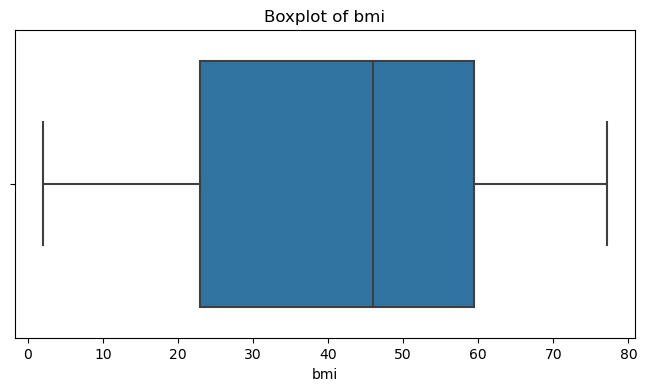

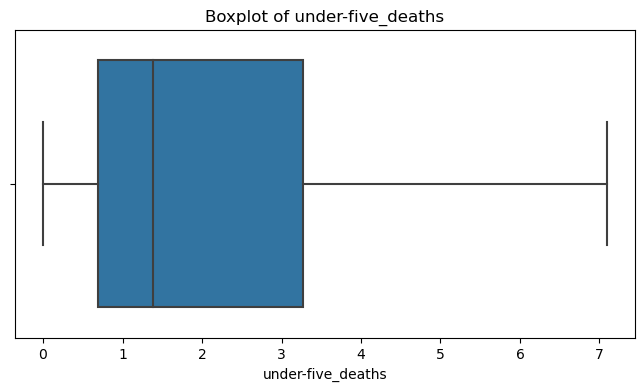

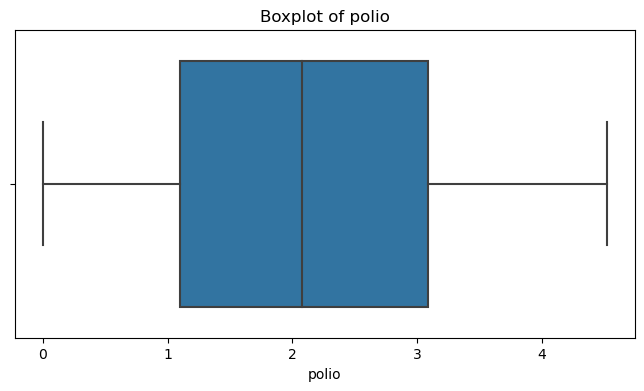

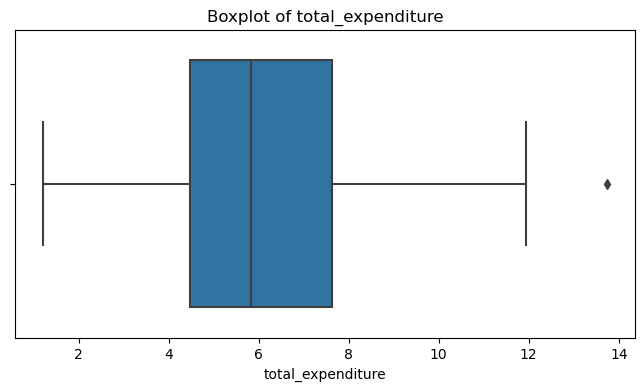

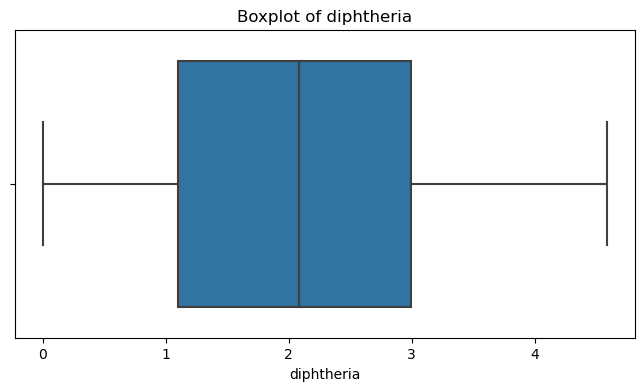

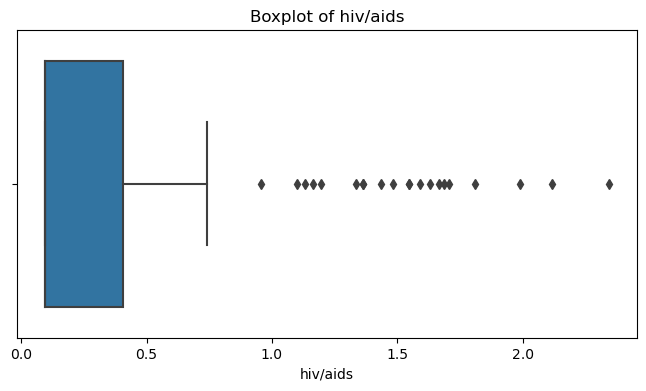

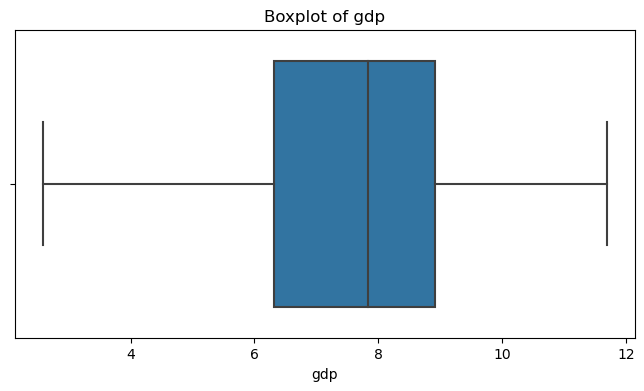

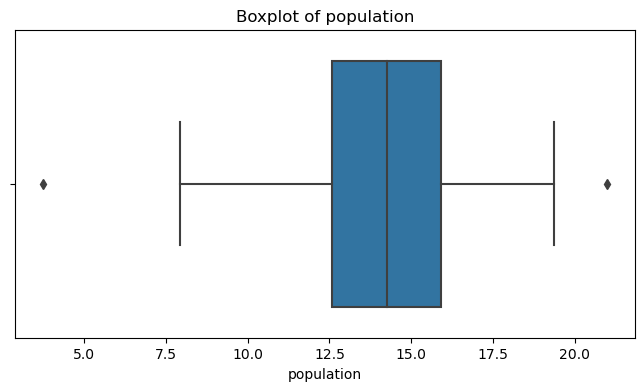

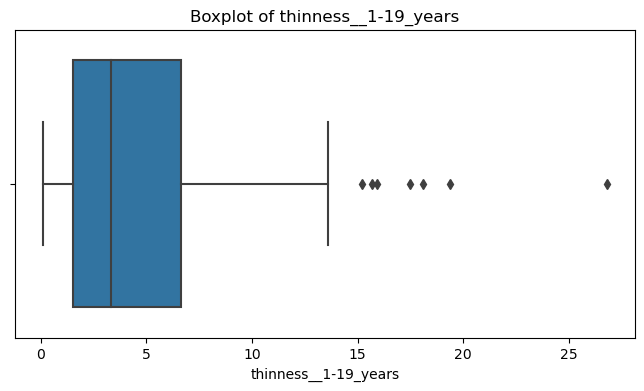

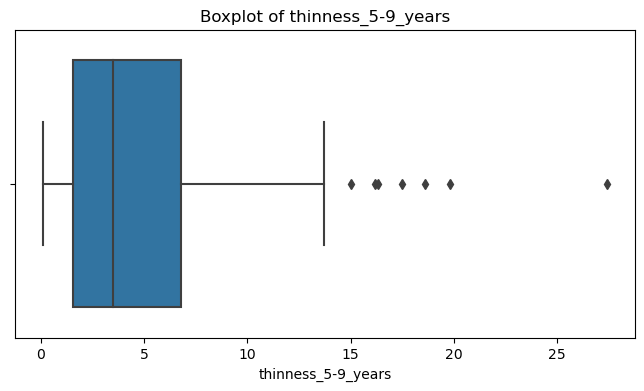

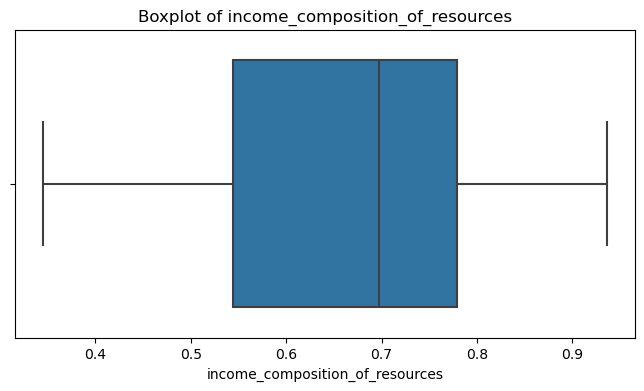

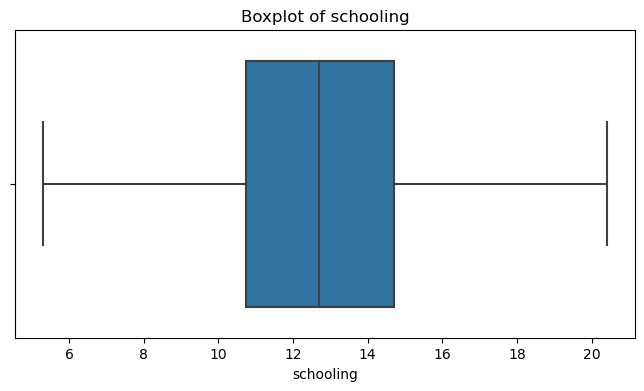

In [228]:
for column in data_latest_year.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data_latest_year[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

# 5. Develop the full model, including all independent variables. 

In [229]:
X = data_latest_year.drop(columns=['life_expectancy', 'country', 'year'])
y = data_latest_year['life_expectancy']

In [230]:
X = pd.get_dummies(X, drop_first=True)

In [231]:
X = sm.add_constant(X)
mlr_model = sm.OLS(y, X).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     52.69
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           1.33e-46
Time:                        18:36:41   Log-Likelihood:                -316.40
No. Observations:                 131   AIC:                             672.8
Df Residuals:                     111   BIC:                             730.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Significant variables include adult_mortality and percentage_expenditure.

In [232]:
# confirm calculation with snir

rss = mlr_model.ssr
df_residuals = mlr_model.df_resid
rse = np.sqrt(rss / df_residuals)
print(f"Standard Error of the Model (RSE): {rse}")

Standard Error of the Model (RSE): 2.942139375327845


##### 2. Address Multicollinearity

In [233]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                            feature         VIF
0                             const  245.700358
1                   adult_mortality    2.769833
2                     infant_deaths  175.484209
3                           alcohol    2.113287
4            percentage_expenditure   11.293472
5                       hepatitis_b    5.908935
6                           measles    1.943411
7                               bmi    2.148614
8                 under-five_deaths  185.448681
9                             polio    9.435932
10                total_expenditure    1.349164
11                       diphtheria   14.069889
12                         hiv/aids    2.309286
13                              gdp   10.975640
14                       population    1.665697
15             thinness__1-19_years    9.827429
16               thinness_5-9_years   10.766275
17  income_composition_of_resources   14.191629
18                        schooling    7.537215
19                status_Developing    1

From your output, the following variables have high VIF (>10):

- infant_deaths (164.28)
- under-five_deaths (175.43)
- percentage_expenditure (10.89)
- diphtheria (14.05)
- thinness__1-19_years (9.73)
- thinness_5-9_years (10.56)
- income_composition_of_resources (12.92)

                                 const  adult_mortality  infant_deaths  \
const                              NaN              NaN            NaN   
adult_mortality                    NaN         1.000000       0.444741   
infant_deaths                      NaN         0.444741       1.000000   
alcohol                            NaN        -0.274181      -0.310098   
percentage_expenditure             NaN        -0.297933      -0.453189   
hepatitis_b                        NaN         0.274859       0.276589   
measles                            NaN         0.197389       0.591804   
bmi                                NaN        -0.399417      -0.436794   
under-five_deaths                  NaN         0.471314       0.995749   
polio                              NaN         0.414343       0.391815   
total_expenditure                  NaN        -0.139523      -0.209737   
diphtheria                         NaN         0.355058       0.352005   
hiv/aids                           NaN

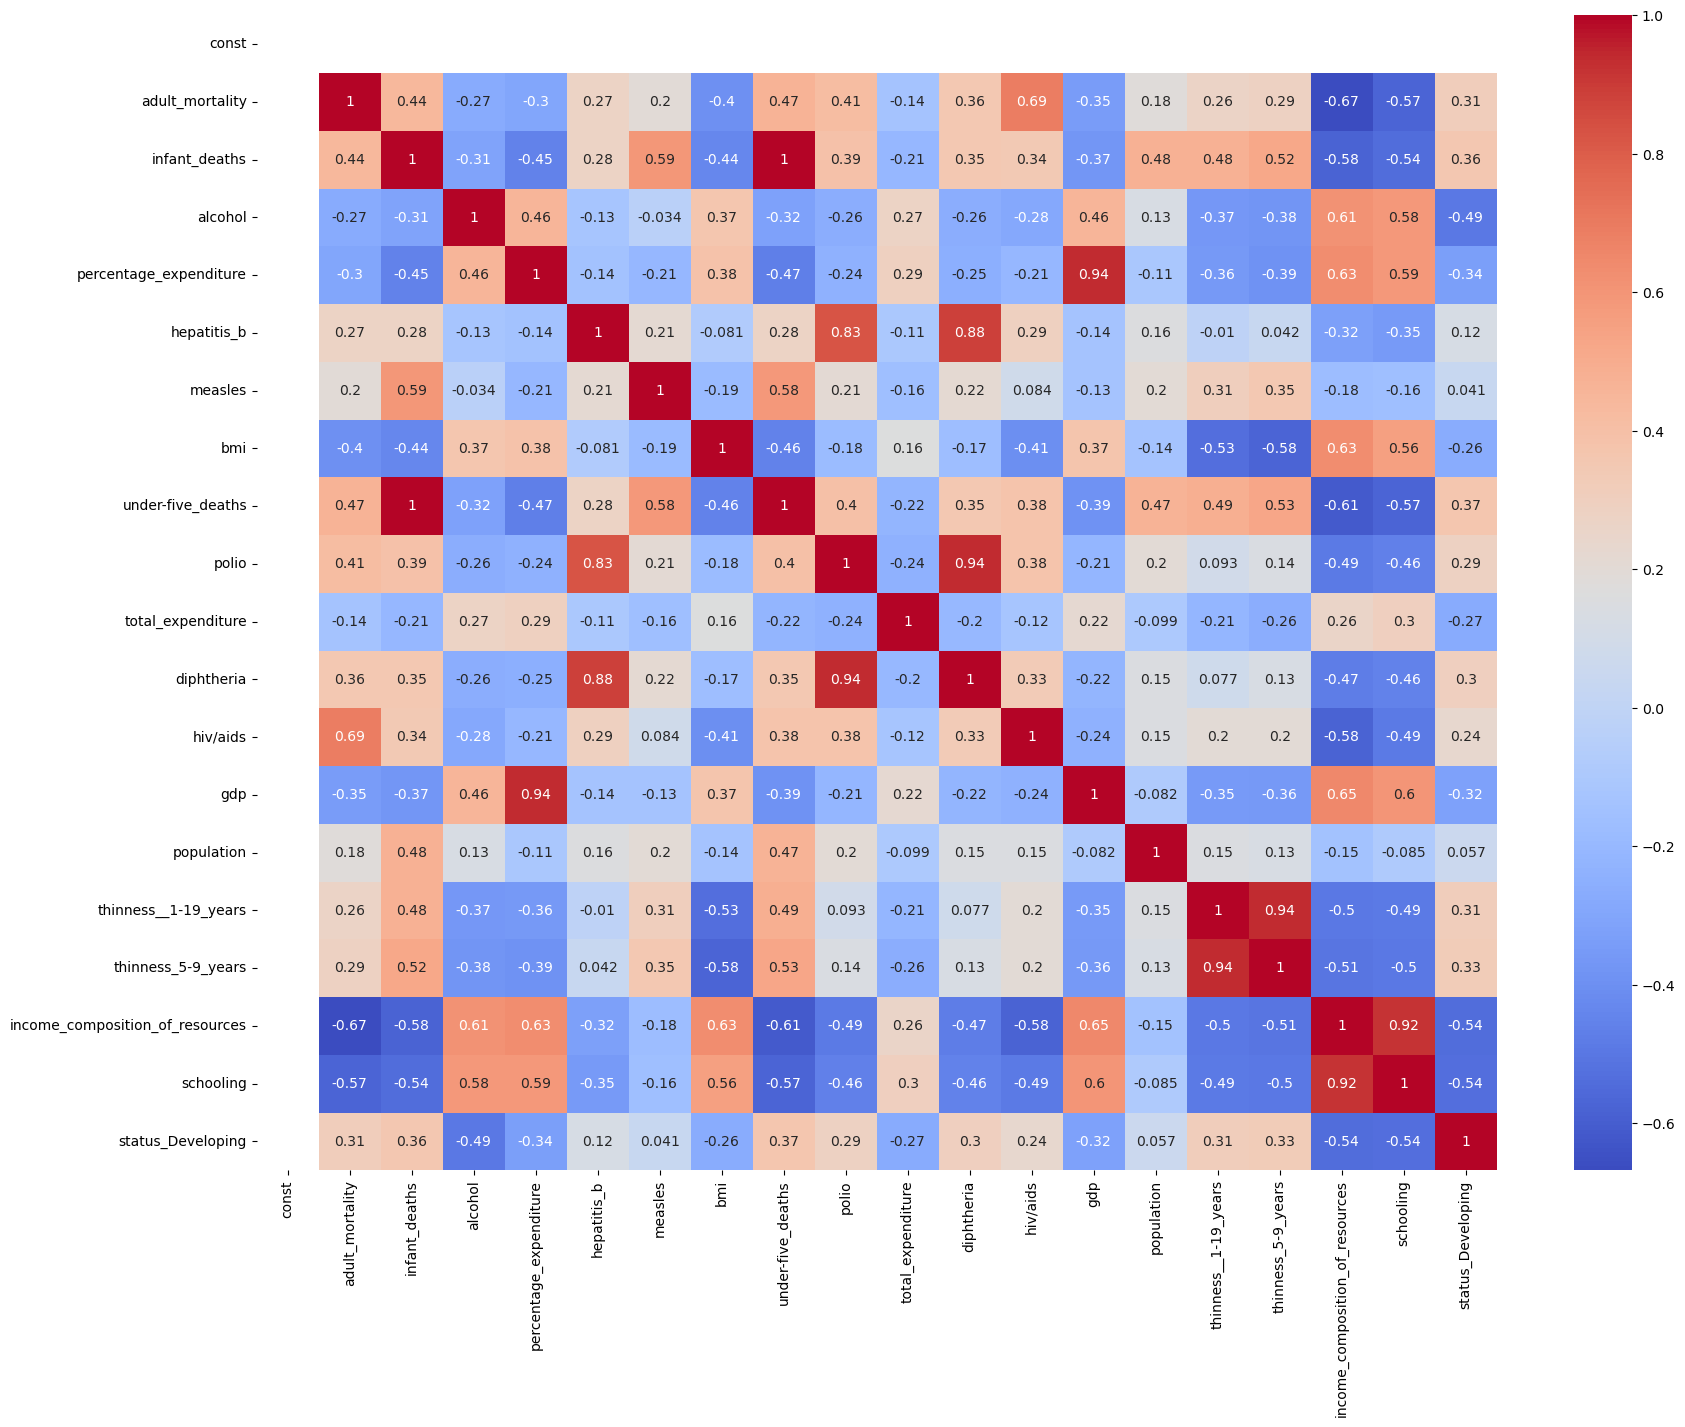

In [234]:
# Correlation matrix
plt.figure(figsize=(20,15))
corr_matrix = X.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

- Remove diphtheria because it's really highly correlated with hepatitis B and polio.

In [235]:
X = X.drop(columns=['diphtheria'])

- Remove thinness 5-9 years because thinness 1-19 years includes thinness 5-9 years

In [236]:
X = X.drop(columns=['thinness_5-9_years'])

- Remove infant deaths (perfectly correlated with under-five deaths)
- Remove schooling (really highly correlated with income composition of resources)
- Remove polio (correlated with hepatitis B)

In [237]:
X = X.drop(columns=['infant_deaths', 'schooling', 'polio'])

In [238]:
# Recalculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                            feature         VIF
0                             const  202.445463
1                   adult_mortality    2.651452
2                           alcohol    1.997779
3            percentage_expenditure   10.734147
4                       hepatitis_b    1.305246
5                           measles    1.897116
6                               bmi    1.988713
7                 under-five_deaths    3.741506
8                 total_expenditure    1.215529
9                          hiv/aids    2.166216
10                              gdp   10.437051
11                       population    1.537850
12             thinness__1-19_years    1.778484
13  income_composition_of_resources    6.229039
14                status_Developing    1.628844


- decided to keep gdp, income composition of resources, and percentage expenditure despite high VIF because all of these markers are significant

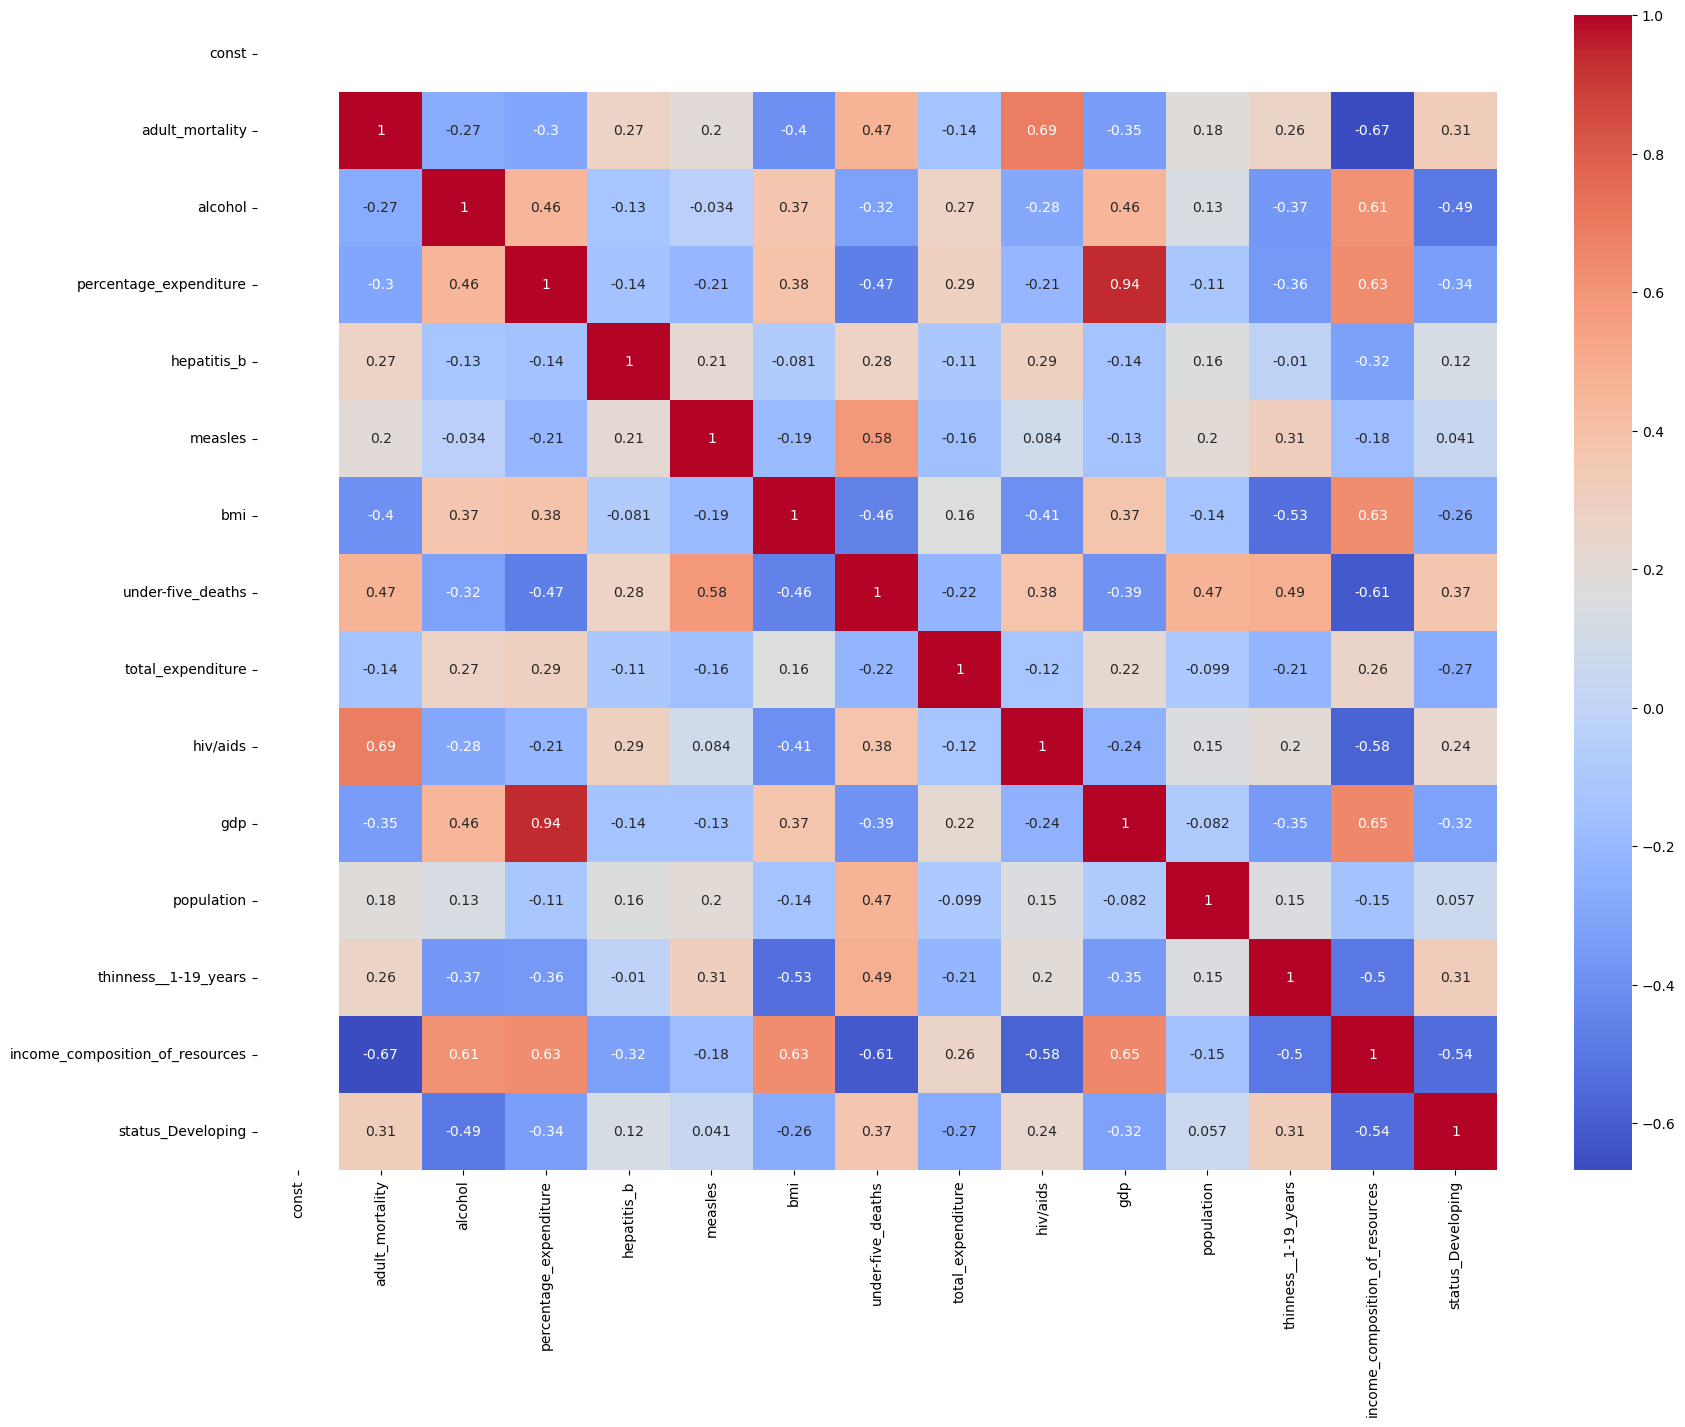

In [239]:
# Recalculate & plot Correlation matrix
plt.figure(figsize=(20,15))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [240]:
mlr_model_refined = sm.OLS(y, sm.add_constant(X)).fit()
print(mlr_model_refined.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     73.27
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           9.97e-51
Time:                        18:36:44   Log-Likelihood:                -317.56
No. Observations:                 131   AIC:                             665.1
Df Residuals:                     116   BIC:                             708.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

##### What's next: finish variable selection, influence/leverage/whatever else points, outliers, residual analysis

# 6. Evaluate the standard regression assumptions, by evaluating residuals

### Residual Analysis

##### Residuals vs. Fitted Values (Linearity and Homoscedasticity)

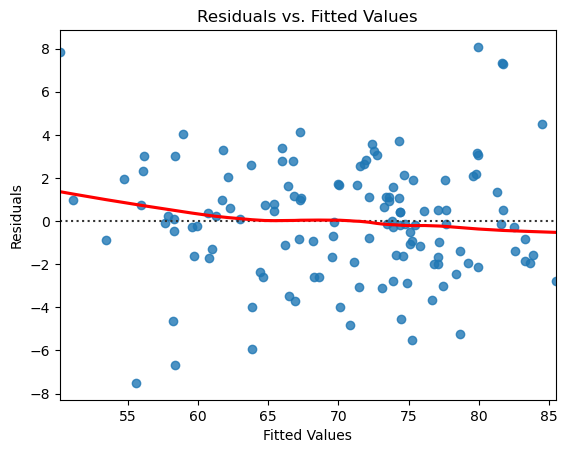

In [241]:
sns.residplot(x=mlr_model_refined.fittedvalues, y=mlr_model_refined.resid, lowess=True, line_kws={"color": "red"})
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

- The residuals are approximately centered around zero, indicating a reasonable fit.
- However, the slight curvature suggests some non-linearity in the relationship between predictors and the dependent variable.
- Conclusion: The model largely meets the linearity assumption, but a more flexible model (e.g., polynomial terms or interaction effects) could improve fit.

##### Normality of Residuals (Q-Q Plot)

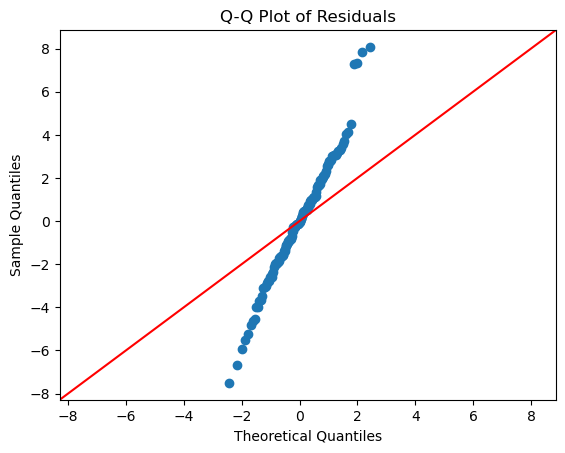

In [242]:
sm.qqplot(mlr_model_refined.resid, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

- Ask Professor Snir what to do about this

### Calculate Studentized Residuals, Leverage, and Cook’s D. 
##### Perhaps look at the histogram of the Studentized Residuals. 

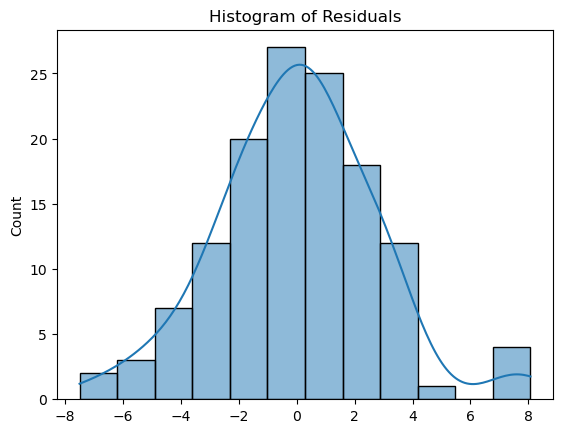

In [243]:
sns.histplot(mlr_model_refined.resid, kde=True)
plt.title("Histogram of Residuals")
plt.show()


**EDIT WORDING ACCORDING TO LECTURE NOTES**
- The residual distribution is approximately symmetric with a slight central peak.
- The accompanying kernel density estimation (KDE) further supports normality.

### Test for Homoscedasticity

##### Breusch-Pagan Test

In [244]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(mlr_model_refined.resid, mlr_model_refined.model.exog)
print(f"Breusch-Pagan Test Statistic: {bp_test[0]}, p-value: {bp_test[1]}")

if bp_test[1] < 0.05:
    print("Evidence of heteroscedasticity. Consider transformations.")
else:
    print("No evidence of heteroscedasticity.")

Breusch-Pagan Test Statistic: 16.969333858683896, p-value: 0.2578157534029793
No evidence of heteroscedasticity.


- Test statistic: 16.97, p-value = 0.257.
- Conclusion: There is no evidence of heteroscedasticity, confirming that the variance of residuals is constant across fitted values.

## Identify Influential Points

### Studentized Residuals

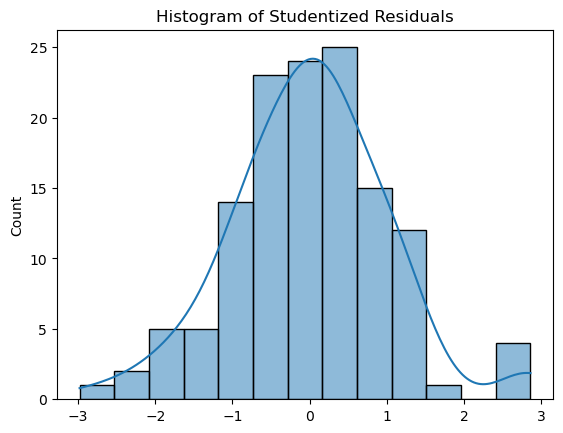

In [245]:
influence = mlr_model_refined.get_influence()
studentized_residuals = influence.resid_studentized_internal
sns.histplot(studentized_residuals, kde=True)
plt.title("Histogram of Studentized Residuals")
plt.show()

In [246]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Calculate studentized residuals
influence = OLSInfluence(mlr_model_refined)
studentized_residuals = influence.resid_studentized_internal

# Flag outliers
outliers = studentized_residuals[abs(studentized_residuals) > 2].index
extreme_outliers = studentized_residuals[abs(studentized_residuals) > 3].index

print("Potential Outliers (|residuals| > 2):", outliers.tolist())
print("Extreme Outliers (|residuals| > 3):", extreme_outliers.tolist())

Potential Outliers (|residuals| > 2): [49, 241, 513, 835, 1027, 2056, 2298]
Extreme Outliers (|residuals| > 3): []


### Leverage

In [247]:
# Calculate leverage
leverage = influence.hat_matrix_diag
k = mlr_model_refined.df_model  # Number of predictors
n = mlr_model_refined.nobs  # Number of observations
leverage_threshold = 3 * (k + 1) / n

# Identify high-leverage points
high_leverage_points = (leverage > leverage_threshold).nonzero()[0]

print("High-Leverage Points (leverage > {:.3f}):".format(leverage_threshold), high_leverage_points)

High-Leverage Points (leverage > 0.344): []


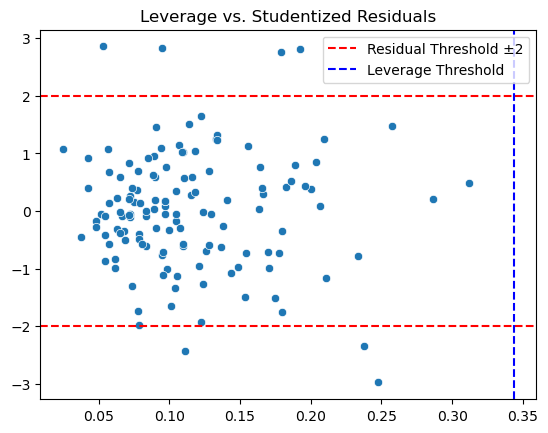

In [248]:
sns.scatterplot(x=leverage, y=studentized_residuals)
plt.axhline(y=2, color='red', linestyle='--', label="Residual Threshold ±2")
plt.axhline(y=-2, color='red', linestyle='--')
plt.axvline(x=leverage_threshold, color='blue', linestyle='--', label="Leverage Threshold")
plt.title("Leverage vs. Studentized Residuals")
plt.legend()
plt.show()


### Cook's D

In [249]:
# Calculate Cook's Distance
cooks_d = influence.cooks_distance[0]
cooks_threshold = 4 / n

# Identify influential points
influential_points = cooks_d[cooks_d > cooks_threshold].index

print("Influential Points (Cook's Distance > {:.3f}):".format(cooks_threshold), influential_points.tolist())


Influential Points (Cook's Distance > 0.031): [49, 241, 513, 835, 1379, 1523, 1894, 2056, 2298, 2731]


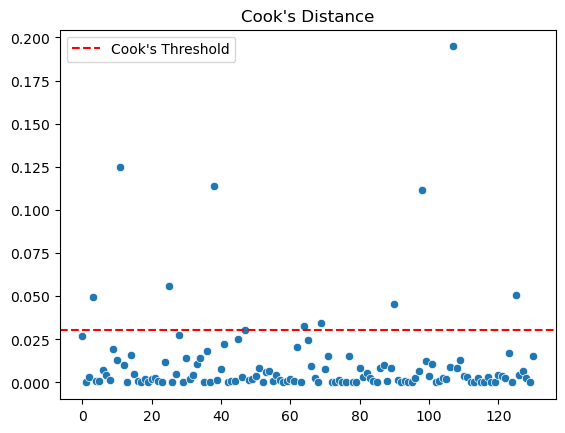

In [250]:
sns.scatterplot(x=range(len(cooks_d)), y=cooks_d)
plt.axhline(y=cooks_threshold, color='red', linestyle='--', label="Cook's Threshold")
plt.title("Cook's Distance")
plt.legend()
plt.show()


- Threshold: 0.031.
- Only a few points exceed the threshold, indicating limited influence of individual observations on the model.
- Conclusion: The model is relatively robust, but sensitivity testing (removing high-influence points) is recommended.

In [251]:
# Remove influential points
X_cleaned = X.drop(index=influential_points)
y_cleaned = y.drop(index=influential_points)

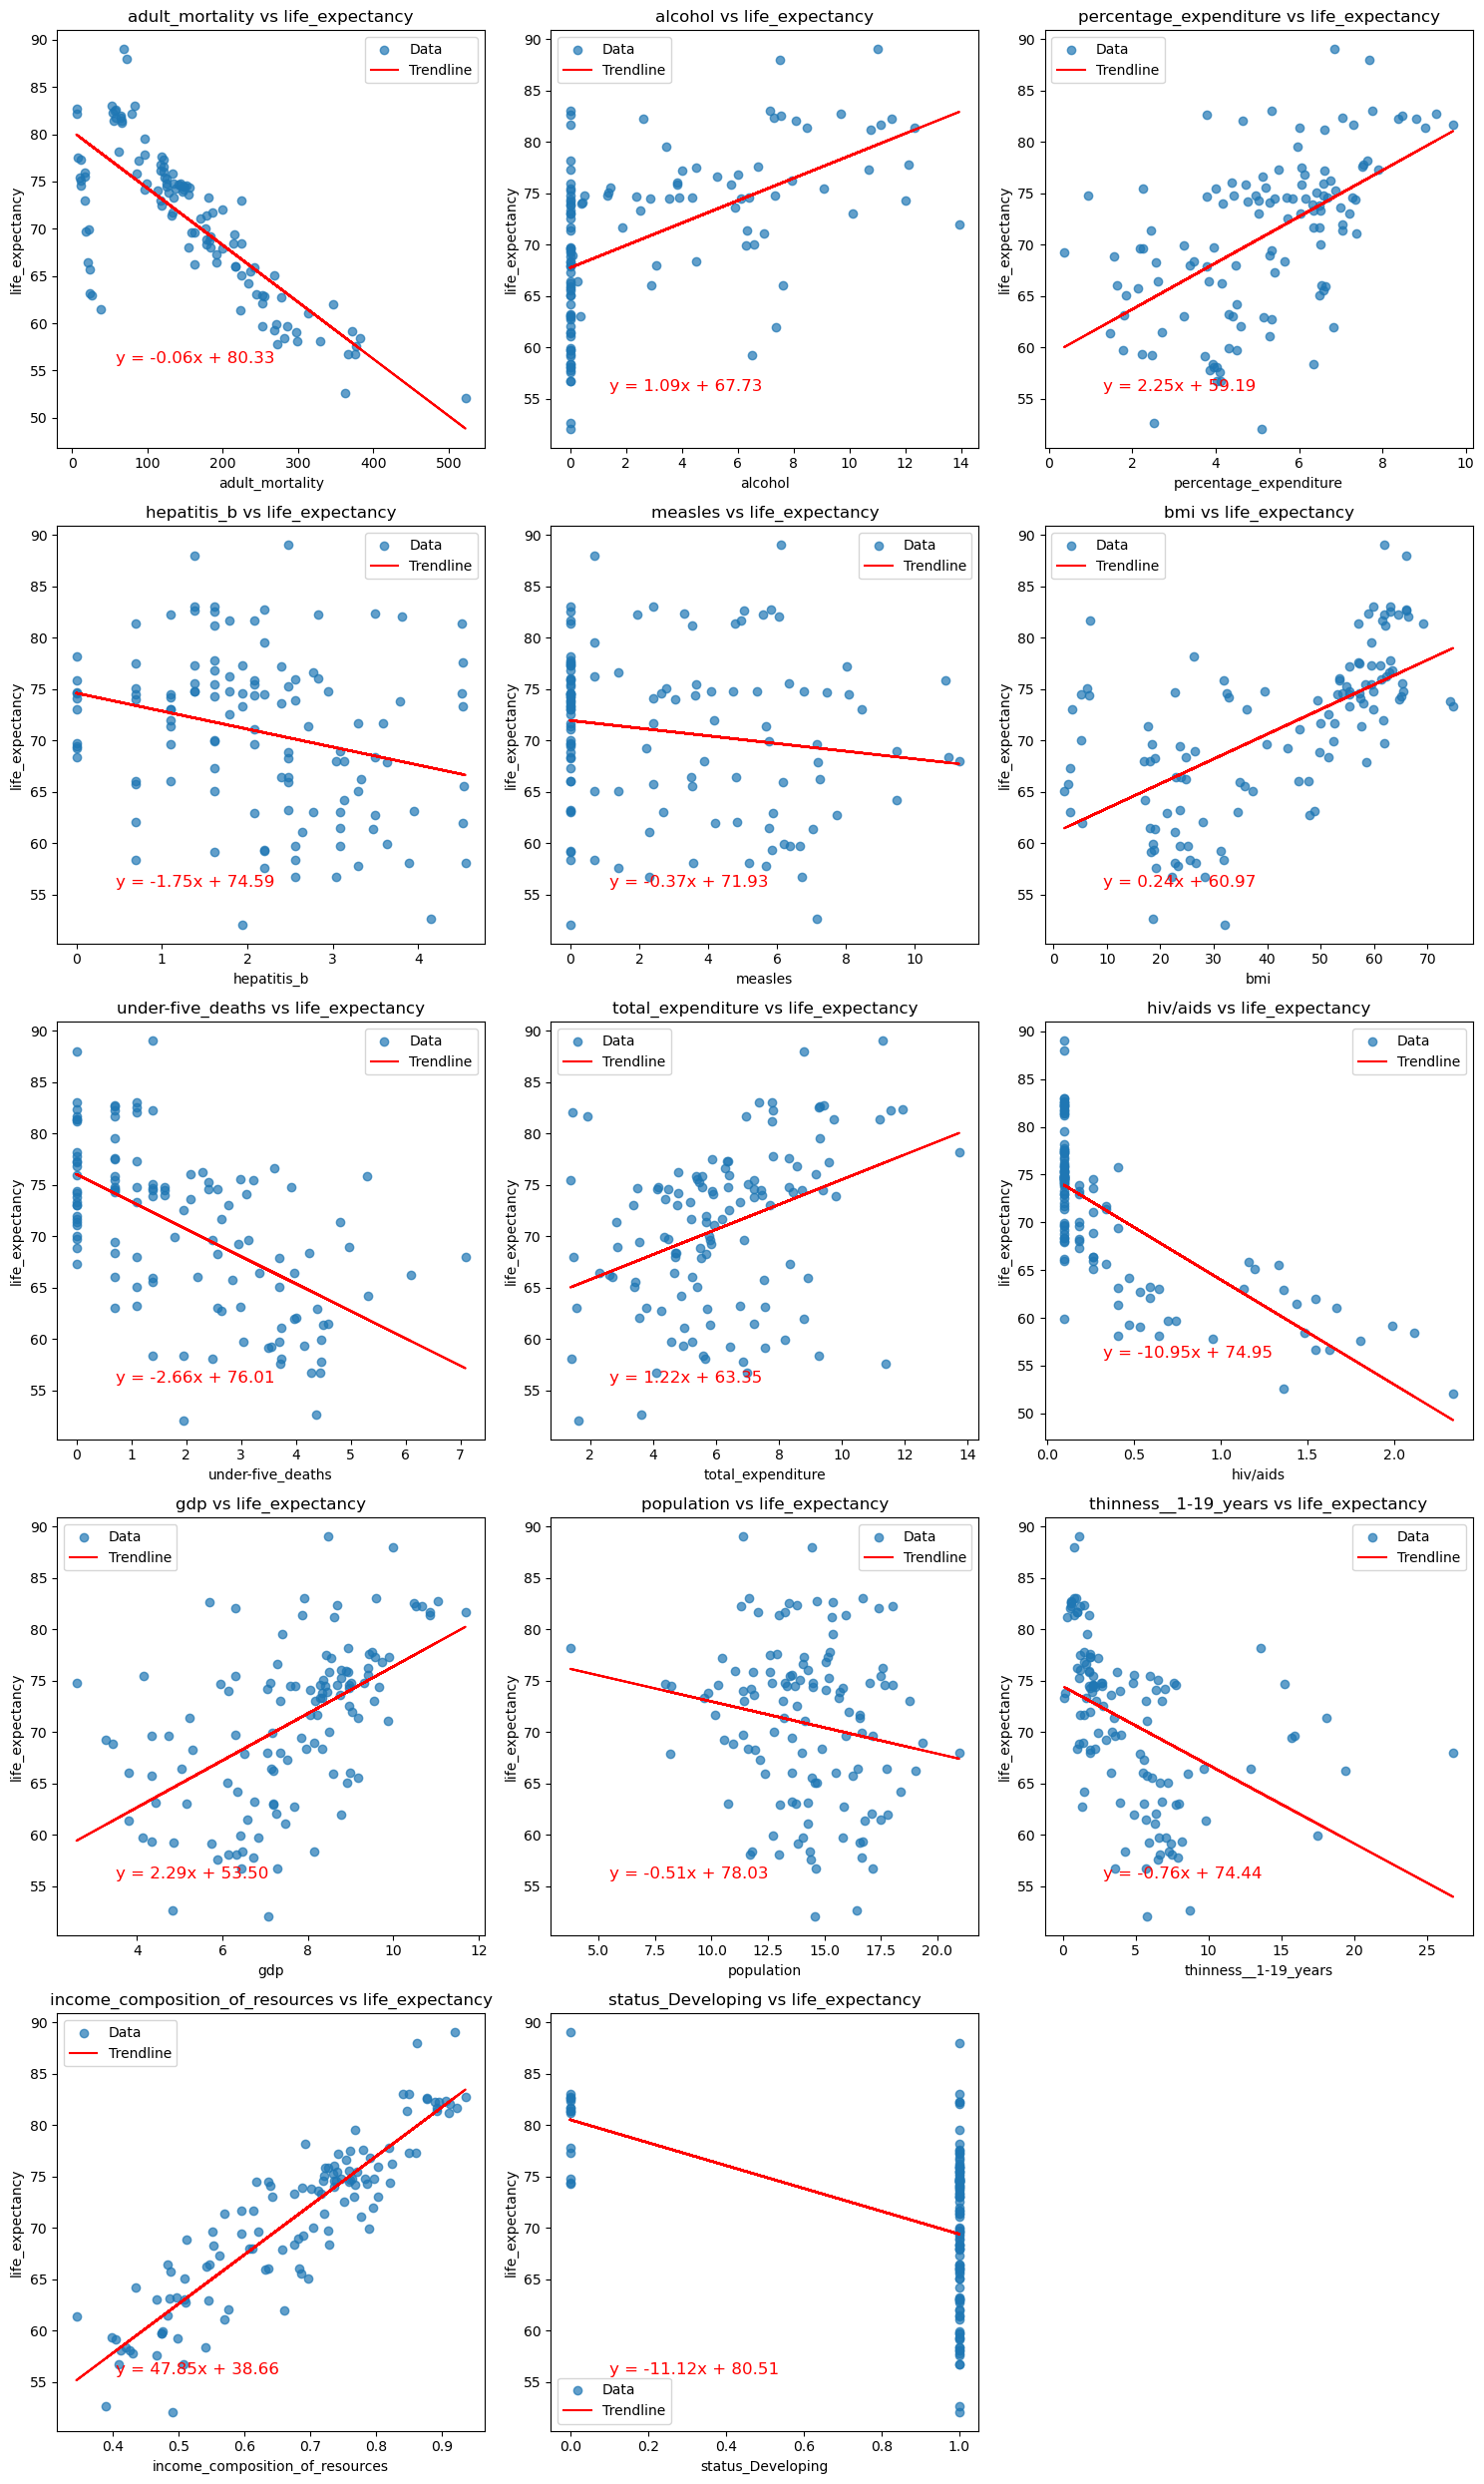

In [252]:
# Define dependent and independent variables
dependent_var = 'life_expectancy'
independent_vars = [col for col in X_cleaned.columns if col != 'const']  # Remove 'const' since it's added for regression

# Determine number of subplots (rows and columns)
n_vars = len(independent_vars)
n_cols = 3  # Choose the number of columns
n_rows = -(-n_vars // n_cols)  # Ceiling division to determine rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot scatterplots with trendlines
for i, var in enumerate(independent_vars):
    # Scatter plot with cleaned data
    axes[i].scatter(X_cleaned[var], y_cleaned, alpha=0.7, label='Data')
    
    # Compute the trendline with cleaned data
    x = X_cleaned[var]
    y = y_cleaned
    coefficients = np.polyfit(x, y, 1)  # Linear fit (degree=1)
    trendline = np.poly1d(coefficients)

    # Extract slope and intercept
    slope, intercept = coefficients
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Plot the trendline
    axes[i].plot(x, trendline(x), color='red', label='Trendline')

    # Add equation of the trendline to the plot
    # Position the equation based on the data range
    x_pos = x.min() + (x.max() - x.min()) * 0.1
    y_pos = y.min() + (y.max() - y.min()) * 0.1
    axes[i].text(x_pos, y_pos, equation, color='red', fontsize=12)
    
    # Add labels and title
    axes[i].set_title(f"{var} vs {dependent_var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(dependent_var)
    axes[i].legend()

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [253]:
# Rerun regression
X_cleaned = sm.add_constant(X_cleaned)
mlr_model_refined_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()

print(mlr_model_refined_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     93.63
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           5.97e-53
Time:                        18:36:51   Log-Likelihood:                -263.59
No. Observations:                 121   AIC:                             557.2
Df Residuals:                     106   BIC:                             599.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [254]:
# confirm calculation with snir

rss = mlr_model_refined_cleaned.ssr
df_residuals = mlr_model_refined_cleaned.df_resid
rse = np.sqrt(rss / df_residuals)
print(f"Standard Error of the Model (RSE): {rse}")

Standard Error of the Model (RSE): 2.2833541947978313


# 7. Decide which variables to include in the MLR, based on the correlations and several MLR models

##### Keep the following variables in the MLR: 
- Any variable that is statistically significant in the complete MLR, with all variables. 
- A variable that is statistically significant in the SLR with the dependent variable. It is sufficient to evaluate the correlation with the dependent variable, rxy. 
- A variable that is significant in a different MLR. 
    - This raises the question of how many models to develop. It is sufficient to develop all 
models with k-1 independent variables. There are k such models. 
    - For the House Prices example, this requires developing 4 models. In each model, remove 
one of the variables, and evaluate the model with the remaining 3 variables. 

##### Significant Predictors from the Complete MLR (outliers removed)
- adult mortality: (p=0.000)
- percentage_expenditure (p=0.002)
- total_expenditure (p=0.003): Now significant after removing influential points.
- hiv/aids (p=0.000)
- gdp (p=0.003)
- income_composition_of_resources (p=0.000)

Non-significant predictors
- alcohol
- hepatitis_b
- measles
- bmi
- under-five_deaths
- population
- thinness__1-19_years
- status_Developing

##### Start with Correlation Analysis:

- Identify independent variables that are statistically significantly correlated with the dependent variable using scatter plots or correlation coefficients.
- Include variables with significant correlation coefficients in the MLR model, even if they are not significant in some individual models​

As a rule of thumb, the correlation between 2 variables is statistically significant, at α = 0.05 
(reject 𝐻0), if the sample correlation is higher (in absolute value) than a certain threshold. The 
threshold depends on the sample size (n).  
- For n = 100, rxy above 0.2 (in absolute value) is sufficient to reject 𝐻0 

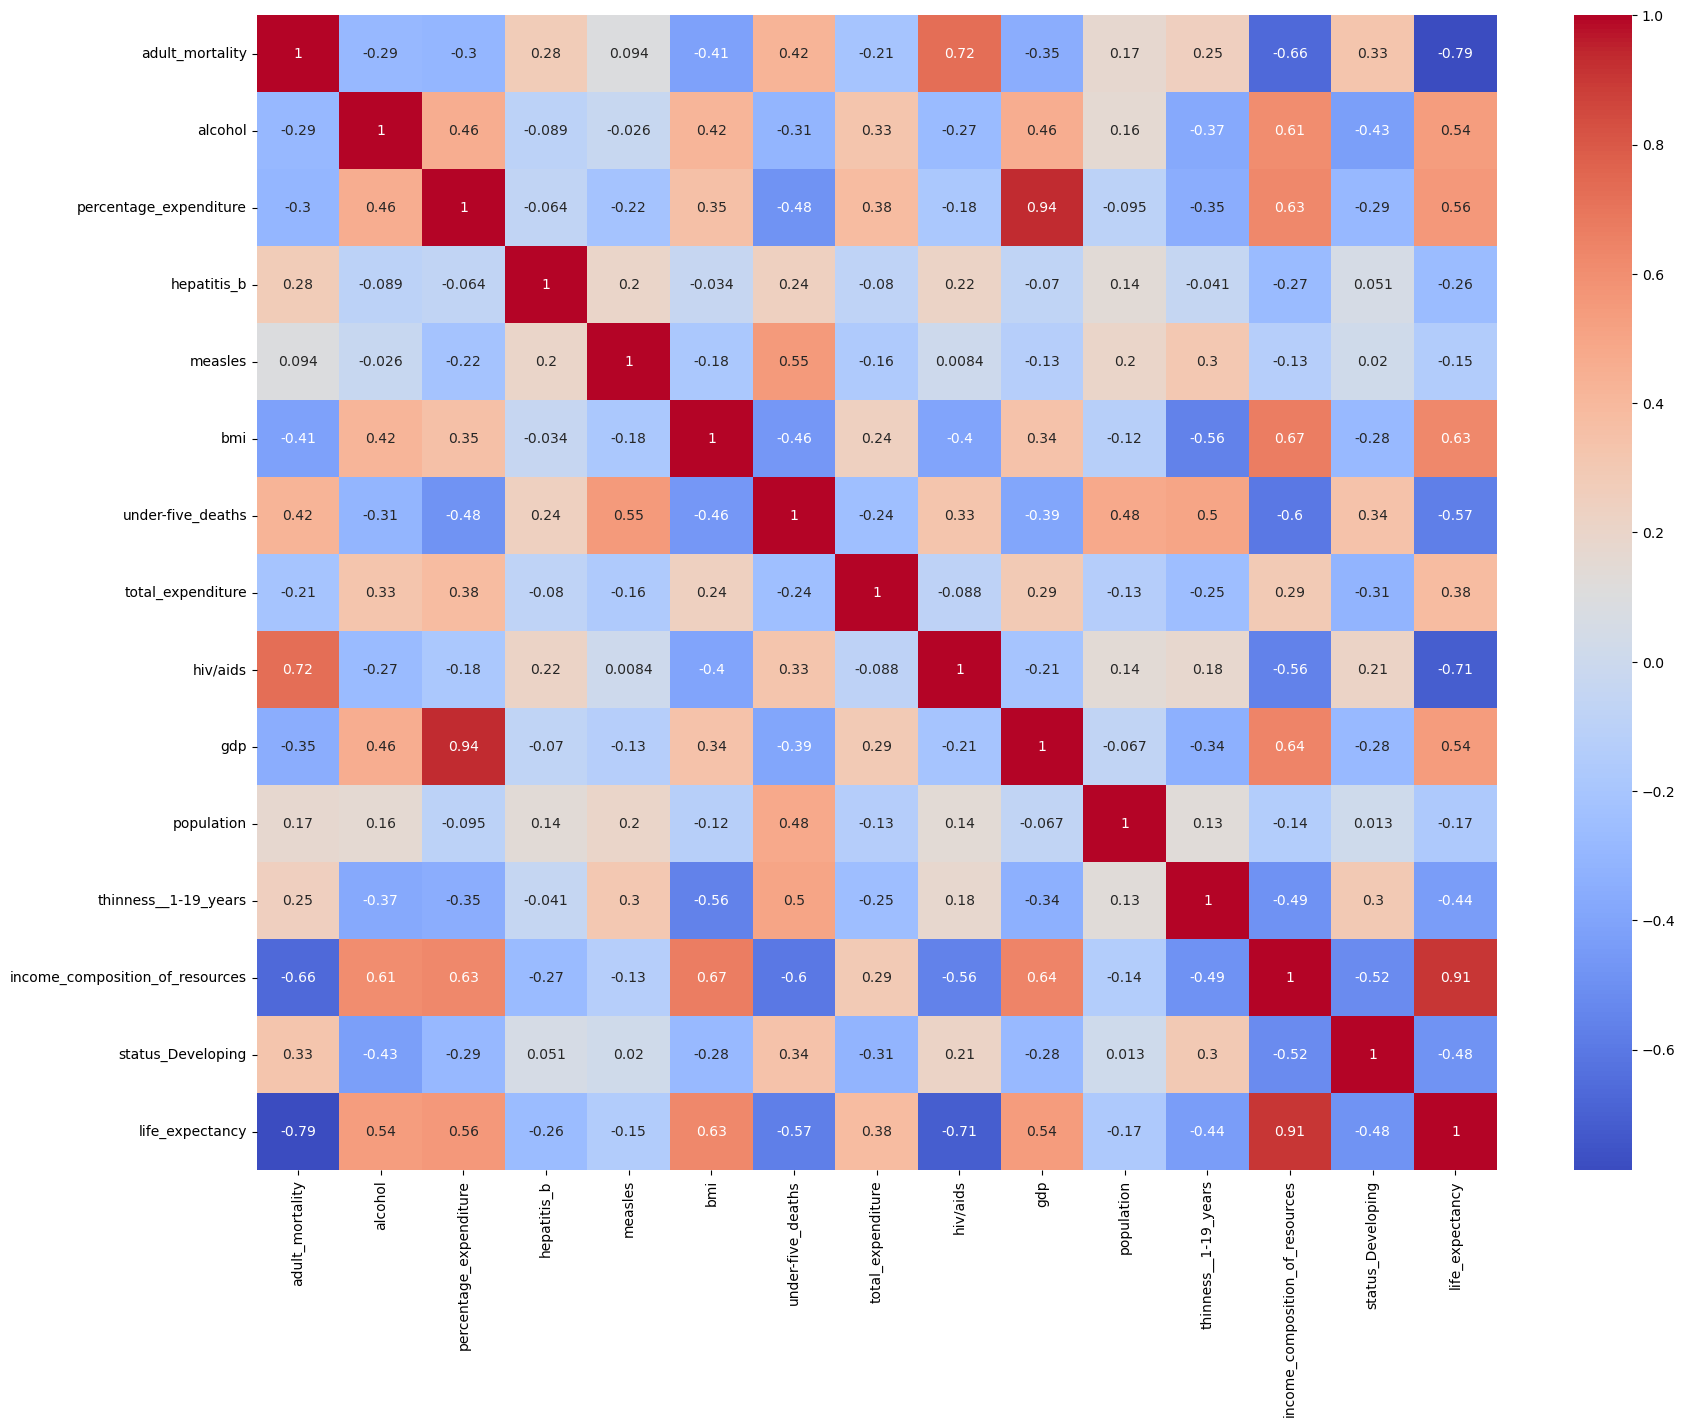

In [255]:
# Recalculate & plot Correlation matrix
if isinstance(y, list):
    y = pd.Series(y, name="life_expectancy")

data_with_y = pd.concat([X_cleaned, y], axis=1)
data_without_const = data_with_y.drop(columns=["const"])

corr_matrix = data_without_const.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

##### Variables that are statistically significant in the SLR with the dependent variable (|rxy| above 0.2 for df >= 100):
- adult mortality
- alcohol
- percentage expenditure
- hepatitis b
- bmi
- total expenditure
- hiv/aids
- gdp
- thinness 1-19 years
- income composition of resources
- status developing

### Develop Multiple Models (k-1 models)

##### Remove Adult Mortality

In [256]:
# Add constant for intercept
X_rm_mortality = X_cleaned.drop(columns=['adult_mortality'])

# Fit full MLR model
model_rm_mortality = sm.OLS(y_cleaned, X_rm_mortality).fit()

# Display the summary of the full model
print(model_rm_mortality.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     80.69
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           4.60e-49
Time:                        18:36:52   Log-Likelihood:                -276.46
No. Observations:                 121   AIC:                             580.9
Df Residuals:                     107   BIC:                             620.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

##### Remove Alcohol

In [257]:
# List of variables to remove (exclude 'const' if it's in X_cleaned)
variables_to_remove = [
    'adult_mortality', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
    'measles', 'bmi', 'under-five_deaths', 'total_expenditure',
    'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
    'income_composition_of_resources', 'status_Developing'
]

# Loop through each variable to remove and fit the model
for variable in variables_to_remove:
    # Remove the current variable from the dataset
    X_reduced = X_cleaned.drop(columns=[variable])
    
    # Add constant for intercept
    X_reduced = sm.add_constant(X_reduced)
    
    # Fit the model
    reduced_model = sm.OLS(y_cleaned, X_reduced).fit()
    
    # Display the results
    print(f"Removed Variable: {variable}")
    print(reduced_model.summary())
    print("\n" + "="*80 + "\n")  # Separator for better readability


Removed Variable: adult_mortality
                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     80.69
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           4.60e-49
Time:                        18:36:52   Log-Likelihood:                -276.46
No. Observations:                 121   AIC:                             580.9
Df Residuals:                     107   BIC:                             620.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Model with Income Composition of Resources Removed
- bmi (p < 0.001)
- status_Developing (p = 0.007)


In [258]:
# variables to retain
retain_vars = [
    'adult_mortality', 'alcohol','percentage_expenditure', 'total_expenditure','hepatitis_b',
    'hiv/aids', 'gdp', 'thinness__1-19_years', 'income_composition_of_resources', 'bmi', 'status_Developing'
]

# Subset cleaned data
X_final = X_cleaned[retain_vars]
X_final = sm.add_constant(X_final)  # Add constant for intercept

# Fit the final model
final_model = sm.OLS(y_cleaned, X_final).fit()

# Display the summary
print(final_model.summary())


                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     120.8
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           9.73e-56
Time:                        18:36:53   Log-Likelihood:                -264.40
No. Observations:                 121   AIC:                             552.8
Df Residuals:                     109   BIC:                             586.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [259]:
# confirm calculation with snir

rss = final_model.ssr
df_residuals = final_model.df_resid
rse = np.sqrt(rss / df_residuals)
print(f"Standard Error of the Model (RSE): {rse}")

Standard Error of the Model (RSE): 2.2668295728208188


# 8. Validate that your residuals adhere to the regression assumptions as described in step 6. 

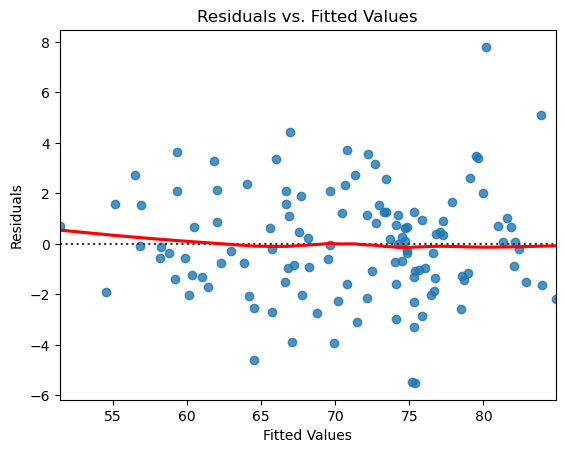

In [260]:
sns.residplot(x=final_model.fittedvalues, y=final_model.resid, lowess=True, line_kws={"color": "red"})
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

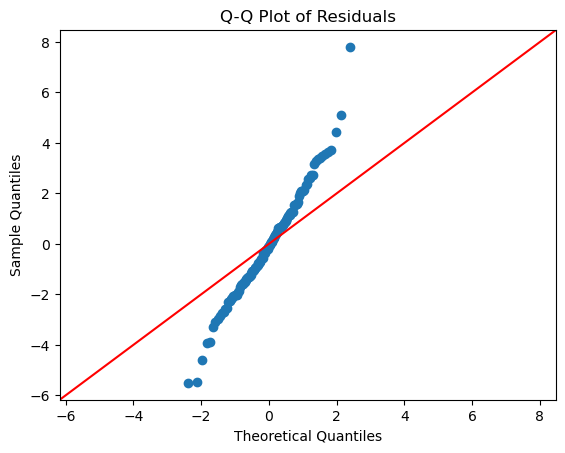

In [261]:
sm.qqplot(final_model.resid, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

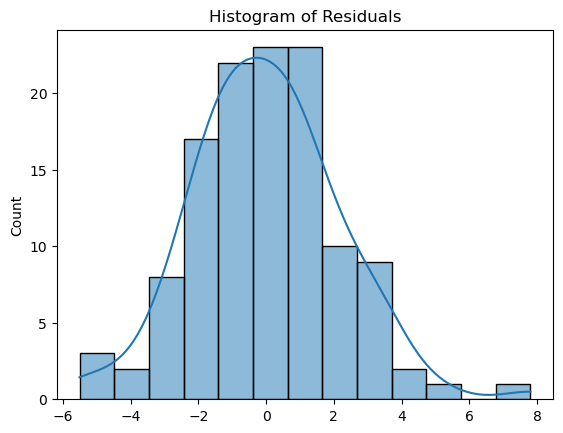

In [262]:

# histogram of residuals

sns.histplot(final_model.resid, kde=True)
plt.title("Histogram of Residuals")
plt.show()

In [263]:
bp_test = het_breuschpagan(final_model.resid, final_model.model.exog)
print(f"Breusch-Pagan Test Statistic: {bp_test[0]}, p-value: {bp_test[1]}")

if bp_test[1] < 0.05:
    print("Evidence of heteroscedasticity. Consider transformations.")
else:
    print("No evidence of heteroscedasticity.")

Breusch-Pagan Test Statistic: 8.193320052008737, p-value: 0.6958889680967939
No evidence of heteroscedasticity.


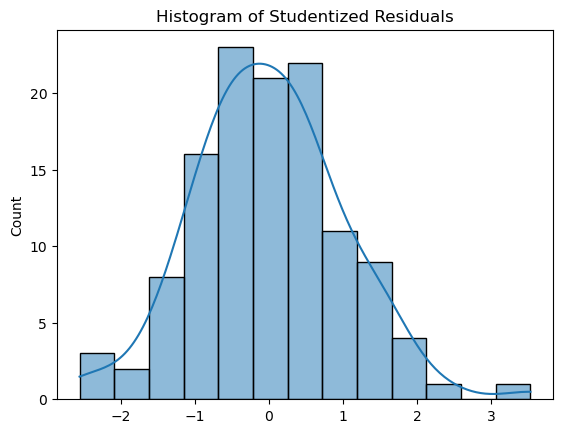

In [264]:
# Studentized Residuals

influence = final_model.get_influence()
studentized_residuals = influence.resid_studentized_internal
sns.histplot(studentized_residuals, kde=True)
plt.title("Histogram of Studentized Residuals")
plt.show()

In [265]:
# Calculate studentized residuals
influence = OLSInfluence(final_model)
studentized_residuals = influence.resid_studentized_internal

# Flag outliers
outliers = studentized_residuals[abs(studentized_residuals) > 2].index
extreme_outliers = studentized_residuals[abs(studentized_residuals) > 3].index

print("Potential Outliers (|residuals| > 2):", outliers.tolist())
print("Extreme Outliers (|residuals| > 3):", extreme_outliers.tolist())

Potential Outliers (|residuals| > 2): [1, 193, 899, 995, 1027, 1347]
Extreme Outliers (|residuals| > 3): [1027]


In [266]:
# Leverage points

# Calculate leverage
leverage = influence.hat_matrix_diag
k = final_model.df_model  # Number of predictors
n = final_model.nobs  # Number of observations
leverage_threshold = 3 * (k + 1) / n

# Identify high-leverage points
high_leverage_points = (leverage > leverage_threshold).nonzero()[0]

print("High-Leverage Points (leverage > {:.3f}):".format(leverage_threshold), high_leverage_points)

High-Leverage Points (leverage > 0.298): []


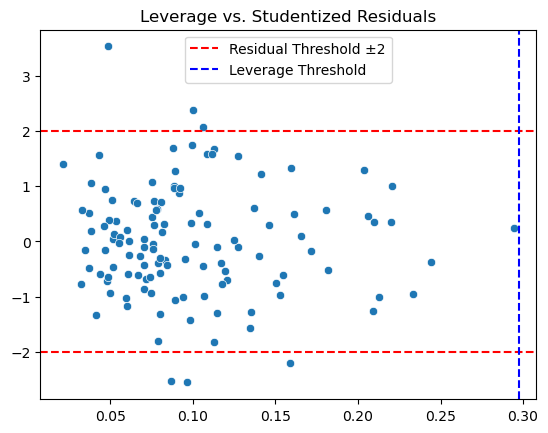

In [267]:
sns.scatterplot(x=leverage, y=studentized_residuals)
plt.axhline(y=2, color='red', linestyle='--', label="Residual Threshold ±2")
plt.axhline(y=-2, color='red', linestyle='--')
plt.axvline(x=leverage_threshold, color='blue', linestyle='--', label="Leverage Threshold")
plt.title("Leverage vs. Studentized Residuals")
plt.legend()
plt.show()

In [270]:
# Cook's D

# Calculate Cook's Distance
cooks_d = influence.cooks_distance[0]
cooks_threshold = 4 / n

# Identify influential points
influential_points = cooks_d[cooks_d > cooks_threshold].index

print("Influential Points (Cook's Distance > {:.3f}):".format(cooks_threshold), influential_points.tolist())

Influential Points (Cook's Distance > 0.033): [1, 193, 593, 899, 995, 1027, 1347, 1830, 2394]


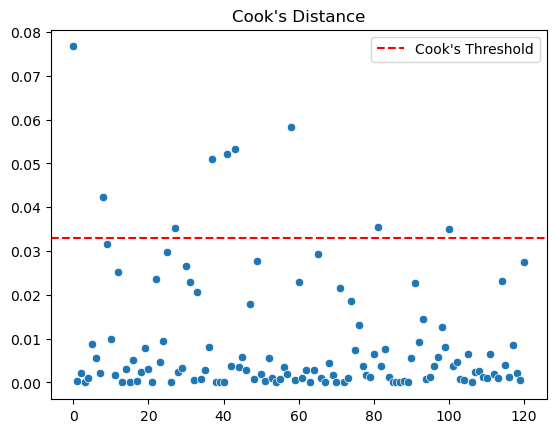

In [271]:
sns.scatterplot(x=range(len(cooks_d)), y=cooks_d)
plt.axhline(y=cooks_threshold, color='red', linestyle='--', label="Cook's Threshold")
plt.title("Cook's Distance")
plt.legend()
plt.show()

In [274]:
# Remove influential points
X_final_cleaned = X_final.drop(index=influential_points)
y_final_cleaned = y_cleaned.drop(index=influential_points)

In [275]:
# Rerun regression
X_final_cleaned = sm.add_constant(X_final_cleaned)
final_model_cleaned = sm.OLS(y_final_cleaned, X_final_cleaned).fit()

print(final_model_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     165.4
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           5.88e-59
Time:                        18:53:00   Log-Likelihood:                -219.87
No. Observations:                 112   AIC:                             463.7
Df Residuals:                     100   BIC:                             496.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [276]:
# confirm calculation with snir

rss = final_model_cleaned.ssr
df_residuals = final_model_cleaned.df_resid
rse = np.sqrt(rss / df_residuals)
print(f"Standard Error of the Model (RSE): {rse}")

Standard Error of the Model (RSE): 1.82372663485657
